# Building a Multiclass Classification Model in PyTorch

PyTorch library is for deep learning. 
Some applications of deep learning models are to solve regression or classification problems. 
In this tutorial, you will discover how to use PyTorch to develop and evaluate neural network models for multi-class classification problems.

## Outcome

After completing this step-by-step tutorial, you will know:

- How to load data from CSV and make it available to PyTorch
- How to prepare multiclass classification data for modeling with neural networks
- How to use cross-validation to evaluate a PyTorch neural network model

## Problem Description

In this tutorial, you will use a standard machine learning dataset called the iris flowers dataset. 
It is a well-studied dataset and good for practicing machine learning. 
It has four input variables, all are numeric and are length measurements in centimeters. 
Therefore, they are in similar scale. 
Each data sample describes the properties of an observed iris flower. 
Its goal is to use the measurements (input features) to classify the iris species (output label).

There are three iris species in the dataset. 
Therefore, it is a multiclass classification problem. 
Multiclass classification problems is special because it requires special handling to specify a class.

This dataset came from Sir Ronald Fisher, the father of modern statistics. 
It is the best known dataset for pattern recognition and you can achieve a model accuracy in the range of 95% to 97%. 
You can make this your target in developing the deep learning model.

You can download the [iris flowers dataset](https://archive.ics.uci.edu/ml/datasets/iris) from the UCI Machine Learning repository and place it in your current working directory with the filename `iris.csv`. 
You can also download the dataset [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv).

## Load the Dataset

There are multiple ways to read a CSV file. 
The easiest way is probably to use pandas library. 
After reading the dataset, we want to split it into features and labels as we need to further process the labels before use. 
Unlike NumPy or PyTorch tensors, pandas DataFrame can do slicing by indices only through iloc:

In [1]:
import pandas as pd
data = pd.read_csv("iris.csv", header=None)
X = data.iloc[:, 0:4]
y = data.iloc[:, 4:]

Now, you loaded the dataset and splitted the attributes (i.e., input features, columns in the DataFrame) as X and output variables (i.e., species labels) as a single-column DataFrame y.

## Encode the Categorical Variable

The species labels are strings, but you want them in numbers. 
It is because numerical data are easier to use. 
In this dataset, the three class labels are Iris-setosa, Iris-versicolor, and Iris-virginica. 
One way to convert these labels into number (i.e., encode them), is simply assign an integer values such as 0, 1, and 2 to replace these labels. 
But there is a problem: You do not want the model to think that Iris-virginica is sum of Iris-setosa and Iris-versicolor. 
In fact, in statistics, there are levels of measurement:

- Nominal numbers: Those numbers are in fact, names. Operations on them do not make sense
- Ordinal numbers: They are orders of something. Comparing for greater or less makes sense but addition or subtraction does not
- Interval numbers: They are measurements, such as the year today, so that subtraction bears meaning (e.g., how old are you) but the zero value is arbitrary and not special
- Ratio numbers: Like interval but the zero is meaningful, such as the measure of length or time. In this case, both subtraction and division bears meaning and we can say that something something is twice as long.

The encoded label is nominal. 
You do not want to mistaken it as interval or ratio data but your model would not know. 
One way to avoid such mistake is one-hot encoding which, instead of converting a label into an integer, you convert a label into a one-hot vector. 
A one-hot vector is a vector of integers but only one of them is 1 and the rest are all zero. 
In this case, you convert the labels into the following:

The above is a one-hot encoded binary matrix. 
You don't need to create it manually. 
You can encode the strings consistently to integers using the scikit-learn class LabelEncoder or into one-hot encoding vectors using the class OneHotEncoder:

In [2]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y)
print(ohe.categories_)
 
y = ohe.transform(y)
print(y)

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]


From these, you can see the OneHotEncoder learned the three categories:

In [3]:
ohe.categories_

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

and the string labels are transformed into one-hot vectors like the following:

In [4]:
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

## Define the Neural Network Model

Now you need to have a model that can take the input and predict the output, ideally in the form of one-hot vectors. 
There is no science behind the design of a perfect neural network model. 
But you know one thing, it has to take in a vector of 4 features and output a vector of 3 values. 
The 4 features corresponds to what you have in the dataset. 
The 3-value output is because we know the one-hot vector has 3 elements. 
Anything can be in between, and those are known as the "hidden layers" since they are neither input nor output.

The simplest is to have only one hidden layer. 
Let's make one like this:

Such design is called the network topology. 
You should use a "softmax" activation at the output layer. 
In formula, it means:

$$
\sigma(z_i) = \dfrac{e^{z_i}}{\sum_{j=1}^3 e^{z_j}}
$$

This is to normalize the values ($z_1,z_2,z_3$) and apply a non-linear function such that the sum of all 3 outputs will be 1 and each of them is in the range of 0 to 1. 
This makes the output looks like a vector of probabilities. 
The use of softmax function at the output is the signature of a multiclass classification model. 
But in PyTorch, you can skip this if you combine with an appropriate loss function.

In PyTorch, we can build such a model as follows:

In [5]:
import torch
import torch.nn as nn
 
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(4, 8)
        self.act = nn.ReLU()
        self.output = nn.Linear(8, 3)
        
    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x
    
model = Multiclass()

The output of this model is the "weight" of the three classes. 
Ideally, the model output will be in such a way that only one of the element is positive infinity and the rest is negative infinity, to make an extreme contrast and absolute confidence of which of the three classes the input features belong to. 
In an imperfect situation, as it happens always, you can expect a good model to tell you that one of the value is very positive and the others are very negative. 
Or, if you transform these values using sigmoid function or softmax function, one is very close to 1 and the others are very close to 0.

In this case, the loss metric for the output can be simply measuring how close is the output to the one-hot vector we transformed from the label. 
But usually in multiclass classification, we use categorical cross entropy as the loss metric. 
In formula, it is

$$
H(p,q) = -\sum_x p(x) \log q(x)
$$

This means, given the real probability vector $p(x)$ and the predicted probability vector $q(x)$, the similarity is the sum of the product of $p(x)$ and $\log q(x)$ for each element $x$. 
The one-hot vector is considered as the probability vector $p(x)$ and the model output is $q(x)$. 
Since it is one-hot vector, only the actual class has $p(x)=1$ and the other classes have $p(x)=0$. 
The sum above essentially is $-\log q(x)$ of the actual class $x$. 
The value will be 0 when $q(x)=1$ and as $q(x)$ approaches 0 (the minimum value softmax can produce), $-\log q(x)$ approaches infinity.

Below is how you can defined the loss metric. 
The CrossEntropyLoss function in PyTorch combines the softmax function with the cross entropy calculation so you don't need any activation function at the output layer of your model. 
You also need an optimizer, which Adam is chosen below.

In [6]:
import torch.optim as optim
 
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Note that when you defined the optimizer, you need to tell it the model parameters as well since these are what the optimizer going to update.

Now you need to run the training loop to train your model. 
Minimally, you need to put three steps in the loop: Forward pass, backward pass, and the weight update. 
The forward pass is to provide the input to the model and take the output. 
The backward pass is to start with the loss metric, which is based on the model output, and propagate back the gradient to the input. 
The weight update is based on the gradient to update the weights.

A minimal training loop can be implemented using a for-loop. 
But you can make use of tqdm to create a progress bar visualization:

In [7]:
import tqdm
 
# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
 
# training parameters
n_epochs = 200
batch_size = 5
batches_per_epoch = len(X) // batch_size
 
for epoch in range(n_epochs):
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()

Epoch 64: 100%|█████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 394.17batch/s]


Epoch 129: 100%|████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 443.54batch/s]


Epoch 194: 100%|████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 359.71batch/s]


Epoch 199: 100%|████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 370.60batch/s]


## Benchmark the Model

The goal of a model is never to match the dataset per se. 
The reason you want to build a machine learning model is to prepare for the data we encountered in the future, which is unseen yet. 
How can you know the model can do that? You need a test set. 
It is a dataset that is same structure as the one used in training, but separate. 
So it is like unseen data from the training process and you can take that as a benchmark. 
This technique of evaluating a model is called cross validation.

Usually you do not add a test set, but to split the data set you obtained into a training set and a test set. 
And use the test set to evaluate the model at the end. 
Such benchmark serve another purpose: You do not want your model to overfit. 
It means the model learned too much about the training set and failed to generalize. 
If this happens, you will see that the model does not give a good result on the test set.

Splitting the data into training set and test set can be easily done with scikit-learn. 
The workflow from loading data to one-hot encoding and spliting is as follows:

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
 
# read data and apply one-hot encoding
data = pd.read_csv("iris.csv", header=None)
X = data.iloc[:, 0:4]
y = data.iloc[:, 4:]
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y)
y = ohe.transform(y)
 
# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
 
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

The arguments train_size=0.7 with shuffle=True means to randomly select 70% of the samples in the dataset into the training set, while the rest will become test set.

Once we did that, we need to modify the training loop to use the training set in training and use the test set at the end of each epoch for benchmarking:

In [9]:
n_epochs = 200
batch_size = 5
batches_per_epoch = len(X_train) // batch_size
 
for epoch in range(n_epochs):
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    print(f"Epoch {epoch} validation: Cross-entropy={float(ce)}, Accuracy={float(acc)}")

Epoch 0: 100%|██████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 309.36batch/s]


Epoch 0 validation: Cross-entropy=0.050809282809495926, Accuracy=1.0


Epoch 1: 100%|██████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 320.11batch/s]


Epoch 1 validation: Cross-entropy=0.049147430807352066, Accuracy=1.0


Epoch 2: 100%|██████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 310.63batch/s]


Epoch 2 validation: Cross-entropy=0.04880659282207489, Accuracy=1.0


Epoch 3: 100%|██████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 344.23batch/s]


Epoch 3 validation: Cross-entropy=0.048597387969493866, Accuracy=1.0


Epoch 4: 100%|██████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 317.22batch/s]


Epoch 4 validation: Cross-entropy=0.04839237034320831, Accuracy=1.0


Epoch 5: 100%|██████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 301.70batch/s]


Epoch 5 validation: Cross-entropy=0.04819256439805031, Accuracy=1.0


Epoch 6: 100%|██████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 472.31batch/s]


Epoch 6 validation: Cross-entropy=0.047994691878557205, Accuracy=1.0


Epoch 7: 100%|██████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 324.84batch/s]


Epoch 7 validation: Cross-entropy=0.04779789596796036, Accuracy=1.0


Epoch 8: 100%|██████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 331.67batch/s]


Epoch 8 validation: Cross-entropy=0.04760242626070976, Accuracy=1.0


Epoch 9: 100%|██████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 415.42batch/s]


Epoch 9 validation: Cross-entropy=0.04740806668996811, Accuracy=1.0


Epoch 10: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 326.47batch/s]


Epoch 10 validation: Cross-entropy=0.047215163707733154, Accuracy=1.0


Epoch 11: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 398.83batch/s]


Epoch 11 validation: Cross-entropy=0.04702339321374893, Accuracy=1.0


Epoch 12: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 326.82batch/s]


Epoch 12 validation: Cross-entropy=0.04683311656117439, Accuracy=1.0


Epoch 13: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 422.00batch/s]


Epoch 13 validation: Cross-entropy=0.04664389416575432, Accuracy=1.0


Epoch 14: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 355.65batch/s]


Epoch 14 validation: Cross-entropy=0.0464562363922596, Accuracy=1.0


Epoch 15: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 350.54batch/s]


Epoch 15 validation: Cross-entropy=0.046269576996564865, Accuracy=1.0


Epoch 16: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 388.21batch/s]


Epoch 16 validation: Cross-entropy=0.04608451947569847, Accuracy=1.0


Epoch 17: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 353.14batch/s]


Epoch 17 validation: Cross-entropy=0.045900411903858185, Accuracy=1.0


Epoch 18: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 439.84batch/s]


Epoch 18 validation: Cross-entropy=0.0456957183778286, Accuracy=1.0


Epoch 19: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 419.01batch/s]


Epoch 19 validation: Cross-entropy=0.04550842568278313, Accuracy=1.0


Epoch 20: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 435.41batch/s]


Epoch 20 validation: Cross-entropy=0.04532913118600845, Accuracy=1.0


Epoch 21: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 355.30batch/s]


Epoch 21 validation: Cross-entropy=0.04515337571501732, Accuracy=1.0


Epoch 22: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 365.64batch/s]


Epoch 22 validation: Cross-entropy=0.04497861862182617, Accuracy=1.0


Epoch 23: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 609.85batch/s]


Epoch 23 validation: Cross-entropy=0.04478483647108078, Accuracy=1.0


Epoch 24: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.84batch/s]


Epoch 24 validation: Cross-entropy=0.04460401087999344, Accuracy=1.0


Epoch 25: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 419.25batch/s]


Epoch 25 validation: Cross-entropy=0.04443280026316643, Accuracy=1.0


Epoch 26: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 422.44batch/s]


Epoch 26 validation: Cross-entropy=0.04426522180438042, Accuracy=1.0


Epoch 27: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.35batch/s]


Epoch 27 validation: Cross-entropy=0.04408082738518715, Accuracy=1.0


Epoch 28: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 421.01batch/s]


Epoch 28 validation: Cross-entropy=0.04390516132116318, Accuracy=1.0


Epoch 29: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 312.48batch/s]


Epoch 29 validation: Cross-entropy=0.043740008026361465, Accuracy=1.0


Epoch 30: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 390.13batch/s]


Epoch 30 validation: Cross-entropy=0.043564073741436005, Accuracy=1.0


Epoch 31: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 413.88batch/s]


Epoch 31 validation: Cross-entropy=0.043392520397901535, Accuracy=1.0


Epoch 32: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 305.45batch/s]


Epoch 32 validation: Cross-entropy=0.043231602758169174, Accuracy=1.0


Epoch 33: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 303.56batch/s]


Epoch 33 validation: Cross-entropy=0.04306240752339363, Accuracy=1.0


Epoch 34: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 342.46batch/s]


Epoch 34 validation: Cross-entropy=0.04289444908499718, Accuracy=1.0


Epoch 35: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 323.68batch/s]


Epoch 35 validation: Cross-entropy=0.042737800627946854, Accuracy=1.0


Epoch 36: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 420.82batch/s]


Epoch 36 validation: Cross-entropy=0.04257384315133095, Accuracy=1.0


Epoch 37: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 418.01batch/s]


Epoch 37 validation: Cross-entropy=0.0424095056951046, Accuracy=1.0


Epoch 38: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.82batch/s]


Epoch 38 validation: Cross-entropy=0.04224802553653717, Accuracy=1.0


Epoch 39: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 422.71batch/s]


Epoch 39 validation: Cross-entropy=0.04208661615848541, Accuracy=1.0


Epoch 40: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 405.85batch/s]


Epoch 40 validation: Cross-entropy=0.04192977771162987, Accuracy=1.0


Epoch 41: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 437.19batch/s]


Epoch 41 validation: Cross-entropy=0.04177084192633629, Accuracy=1.0


Epoch 42: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 444.93batch/s]


Epoch 42 validation: Cross-entropy=0.04161852225661278, Accuracy=1.0


Epoch 43: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 523.32batch/s]


Epoch 43 validation: Cross-entropy=0.04146194085478783, Accuracy=1.0


Epoch 44: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 636.41batch/s]


Epoch 44 validation: Cross-entropy=0.04131380841135979, Accuracy=1.0


Epoch 45: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 402.90batch/s]


Epoch 45 validation: Cross-entropy=0.041159410029649734, Accuracy=1.0


Epoch 46: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 446.76batch/s]


Epoch 46 validation: Cross-entropy=0.04101390764117241, Accuracy=0.9777777791023254


Epoch 47: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.50batch/s]


Epoch 47 validation: Cross-entropy=0.04086209833621979, Accuracy=1.0


Epoch 48: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 410.39batch/s]


Epoch 48 validation: Cross-entropy=0.040721092373132706, Accuracy=0.9777777791023254


Epoch 49: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 325.87batch/s]


Epoch 49 validation: Cross-entropy=0.040570005774497986, Accuracy=0.9777777791023254


Epoch 50: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 407.71batch/s]


Epoch 50 validation: Cross-entropy=0.040416840463876724, Accuracy=0.9777777791023254


Epoch 51: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 323.39batch/s]


Epoch 51 validation: Cross-entropy=0.040284495800733566, Accuracy=0.9777777791023254


Epoch 52: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 362.80batch/s]


Epoch 52 validation: Cross-entropy=0.04013814404606819, Accuracy=0.9777777791023254


Epoch 53: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 429.82batch/s]


Epoch 53 validation: Cross-entropy=0.040006332099437714, Accuracy=0.9777777791023254


Epoch 54: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 447.31batch/s]


Epoch 54 validation: Cross-entropy=0.03986360877752304, Accuracy=0.9777777791023254


Epoch 55: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 403.43batch/s]


Epoch 55 validation: Cross-entropy=0.03971507027745247, Accuracy=0.9777777791023254


Epoch 56: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 598.57batch/s]


Epoch 56 validation: Cross-entropy=0.03959209844470024, Accuracy=0.9777777791023254


Epoch 57: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 449.53batch/s]


Epoch 57 validation: Cross-entropy=0.03945454955101013, Accuracy=0.9777777791023254


Epoch 58: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 412.44batch/s]


Epoch 58 validation: Cross-entropy=0.03930765390396118, Accuracy=0.9777777791023254


Epoch 59: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 428.12batch/s]


Epoch 59 validation: Cross-entropy=0.03918890282511711, Accuracy=0.9777777791023254


Epoch 60: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 355.58batch/s]


Epoch 60 validation: Cross-entropy=0.03905664384365082, Accuracy=0.9777777791023254


Epoch 61: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 383.30batch/s]


Epoch 61 validation: Cross-entropy=0.038920365273952484, Accuracy=0.9777777791023254


Epoch 62: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 463.19batch/s]


Epoch 62 validation: Cross-entropy=0.03877861797809601, Accuracy=0.9777777791023254


Epoch 63: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 404.95batch/s]


Epoch 63 validation: Cross-entropy=0.03867020085453987, Accuracy=0.9777777791023254


Epoch 64: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 388.41batch/s]


Epoch 64 validation: Cross-entropy=0.03854404017329216, Accuracy=0.9777777791023254


Epoch 65: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 338.24batch/s]


Epoch 65 validation: Cross-entropy=0.03841305524110794, Accuracy=0.9777777791023254


Epoch 66: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.62batch/s]


Epoch 66 validation: Cross-entropy=0.03828594833612442, Accuracy=0.9777777791023254


Epoch 67: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.41batch/s]


Epoch 67 validation: Cross-entropy=0.03814929351210594, Accuracy=0.9777777791023254


Epoch 68: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 247.78batch/s]


Epoch 68 validation: Cross-entropy=0.03805026039481163, Accuracy=0.9777777791023254


Epoch 69: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 319.17batch/s]


Epoch 69 validation: Cross-entropy=0.03793135657906532, Accuracy=0.9777777791023254


Epoch 70: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 361.03batch/s]


Epoch 70 validation: Cross-entropy=0.03780712932348251, Accuracy=0.9777777791023254


Epoch 71: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 601.63batch/s]


Epoch 71 validation: Cross-entropy=0.03768690302968025, Accuracy=0.9777777791023254


Epoch 72: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 581.99batch/s]


Epoch 72 validation: Cross-entropy=0.03756919875741005, Accuracy=0.9777777791023254


Epoch 73: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 435.76batch/s]


Epoch 73 validation: Cross-entropy=0.03745292127132416, Accuracy=0.9777777791023254


Epoch 74: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 436.09batch/s]


Epoch 74 validation: Cross-entropy=0.03732096776366234, Accuracy=0.9777777791023254


Epoch 75: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 436.94batch/s]


Epoch 75 validation: Cross-entropy=0.03723396733403206, Accuracy=0.9777777791023254


Epoch 76: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 305.52batch/s]


Epoch 76 validation: Cross-entropy=0.03712274506688118, Accuracy=0.9777777791023254


Epoch 77: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.52batch/s]


Epoch 77 validation: Cross-entropy=0.037008192390203476, Accuracy=0.9777777791023254


Epoch 78: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.49batch/s]


Epoch 78 validation: Cross-entropy=0.036897916346788406, Accuracy=0.9777777791023254


Epoch 79: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 412.84batch/s]


Epoch 79 validation: Cross-entropy=0.03678884729743004, Accuracy=0.9777777791023254


Epoch 80: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.87batch/s]


Epoch 80 validation: Cross-entropy=0.03668089583516121, Accuracy=0.9777777791023254


Epoch 81: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.26batch/s]


Epoch 81 validation: Cross-entropy=0.0365743413567543, Accuracy=0.9777777791023254


Epoch 82: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 328.65batch/s]


Epoch 82 validation: Cross-entropy=0.03646911308169365, Accuracy=0.9777777791023254


Epoch 83: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 317.51batch/s]


Epoch 83 validation: Cross-entropy=0.03636515513062477, Accuracy=0.9777777791023254


Epoch 84: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 319.15batch/s]


Epoch 84 validation: Cross-entropy=0.036262452602386475, Accuracy=0.9777777791023254


Epoch 85: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 302.43batch/s]


Epoch 85 validation: Cross-entropy=0.03616092726588249, Accuracy=0.9777777791023254


Epoch 86: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.02batch/s]


Epoch 86 validation: Cross-entropy=0.036060530692338943, Accuracy=0.9777777791023254


Epoch 87: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 330.29batch/s]


Epoch 87 validation: Cross-entropy=0.035961274057626724, Accuracy=0.9777777791023254


Epoch 88: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.55batch/s]


Epoch 88 validation: Cross-entropy=0.03586312010884285, Accuracy=0.9777777791023254


Epoch 89: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 257.05batch/s]


Epoch 89 validation: Cross-entropy=0.035766035318374634, Accuracy=0.9777777791023254


Epoch 90: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 311.33batch/s]


Epoch 90 validation: Cross-entropy=0.03567000851035118, Accuracy=0.9777777791023254


Epoch 91: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 420.13batch/s]


Epoch 91 validation: Cross-entropy=0.03557504713535309, Accuracy=0.9777777791023254


Epoch 92: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 405.02batch/s]


Epoch 92 validation: Cross-entropy=0.03548106923699379, Accuracy=0.9777777791023254


Epoch 93: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 317.96batch/s]


Epoch 93 validation: Cross-entropy=0.03538813069462776, Accuracy=0.9777777791023254


Epoch 94: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 259.92batch/s]


Epoch 94 validation: Cross-entropy=0.035296160727739334, Accuracy=0.9777777791023254


Epoch 95: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 319.73batch/s]


Epoch 95 validation: Cross-entropy=0.035205159336328506, Accuracy=0.9777777791023254


Epoch 96: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 305.88batch/s]


Epoch 96 validation: Cross-entropy=0.035115111619234085, Accuracy=0.9777777791023254


Epoch 97: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 328.09batch/s]


Epoch 97 validation: Cross-entropy=0.03502601012587547, Accuracy=0.9777777791023254


Epoch 98: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 308.35batch/s]


Epoch 98 validation: Cross-entropy=0.03493789583444595, Accuracy=0.9777777791023254


Epoch 99: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 302.55batch/s]


Epoch 99 validation: Cross-entropy=0.03485065698623657, Accuracy=0.9777777791023254


Epoch 100: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 371.86batch/s]


Epoch 100 validation: Cross-entropy=0.03476434573531151, Accuracy=0.9777777791023254


Epoch 101: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 448.73batch/s]


Epoch 101 validation: Cross-entropy=0.03467893227934837, Accuracy=0.9777777791023254


Epoch 102: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 413.88batch/s]


Epoch 102 validation: Cross-entropy=0.03459443524479866, Accuracy=0.9777777791023254


Epoch 103: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 321.07batch/s]


Epoch 103 validation: Cross-entropy=0.03451087325811386, Accuracy=0.9777777791023254


Epoch 104: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 310.64batch/s]


Epoch 104 validation: Cross-entropy=0.03442811220884323, Accuracy=0.9777777791023254


Epoch 105: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 326.13batch/s]


Epoch 105 validation: Cross-entropy=0.03434627503156662, Accuracy=0.9777777791023254


Epoch 106: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 431.78batch/s]


Epoch 106 validation: Cross-entropy=0.03426524996757507, Accuracy=0.9777777791023254


Epoch 107: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 400.29batch/s]


Epoch 107 validation: Cross-entropy=0.03419163450598717, Accuracy=0.9777777791023254


Epoch 108: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 436.43batch/s]


Epoch 108 validation: Cross-entropy=0.03411517292261124, Accuracy=0.9777777791023254


Epoch 109: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 410.04batch/s]


Epoch 109 validation: Cross-entropy=0.034029826521873474, Accuracy=0.9777777791023254


Epoch 110: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 430.70batch/s]


Epoch 110 validation: Cross-entropy=0.033956341445446014, Accuracy=0.9777777791023254


Epoch 111: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 446.62batch/s]


Epoch 111 validation: Cross-entropy=0.0338837206363678, Accuracy=0.9777777791023254


Epoch 112: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 428.18batch/s]


Epoch 112 validation: Cross-entropy=0.033808112144470215, Accuracy=0.9777777791023254


Epoch 113: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 415.64batch/s]


Epoch 113 validation: Cross-entropy=0.033733658492565155, Accuracy=0.9777777791023254


Epoch 114: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 419.74batch/s]


Epoch 114 validation: Cross-entropy=0.033660534769296646, Accuracy=0.9777777791023254


Epoch 115: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 398.94batch/s]


Epoch 115 validation: Cross-entropy=0.033588260412216187, Accuracy=0.9777777791023254


Epoch 116: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 411.76batch/s]


Epoch 116 validation: Cross-entropy=0.03351688012480736, Accuracy=0.9777777791023254


Epoch 117: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 323.94batch/s]


Epoch 117 validation: Cross-entropy=0.03344633802771568, Accuracy=0.9777777791023254


Epoch 118: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 442.32batch/s]


Epoch 118 validation: Cross-entropy=0.033376626670360565, Accuracy=0.9777777791023254


Epoch 119: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 422.43batch/s]


Epoch 119 validation: Cross-entropy=0.03330771625041962, Accuracy=0.9777777791023254


Epoch 120: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 436.41batch/s]


Epoch 120 validation: Cross-entropy=0.03323968127369881, Accuracy=0.9777777791023254


Epoch 121: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 473.60batch/s]


Epoch 121 validation: Cross-entropy=0.033172398805618286, Accuracy=0.9777777791023254


Epoch 122: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.88batch/s]


Epoch 122 validation: Cross-entropy=0.03310596942901611, Accuracy=0.9777777791023254


Epoch 123: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 433.00batch/s]


Epoch 123 validation: Cross-entropy=0.03304026275873184, Accuracy=0.9777777791023254


Epoch 124: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 448.88batch/s]


Epoch 124 validation: Cross-entropy=0.03297535330057144, Accuracy=0.9777777791023254


Epoch 125: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 457.54batch/s]


Epoch 125 validation: Cross-entropy=0.032911188900470734, Accuracy=0.9777777791023254


Epoch 126: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 394.34batch/s]


Epoch 126 validation: Cross-entropy=0.03284783288836479, Accuracy=0.9777777791023254


Epoch 127: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 404.68batch/s]


Epoch 127 validation: Cross-entropy=0.03278519958257675, Accuracy=0.9777777791023254


Epoch 128: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 364.23batch/s]


Epoch 128 validation: Cross-entropy=0.03272328898310661, Accuracy=0.9777777791023254


Epoch 129: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 306.03batch/s]


Epoch 129 validation: Cross-entropy=0.032662130892276764, Accuracy=0.9777777791023254


Epoch 130: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 419.24batch/s]


Epoch 130 validation: Cross-entropy=0.03260168433189392, Accuracy=0.9777777791023254


Epoch 131: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.43batch/s]


Epoch 131 validation: Cross-entropy=0.03254194185137749, Accuracy=0.9777777791023254


Epoch 132: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.10batch/s]


Epoch 132 validation: Cross-entropy=0.032485079020261765, Accuracy=0.9777777791023254


Epoch 133: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.00batch/s]


Epoch 133 validation: Cross-entropy=0.03242780640721321, Accuracy=0.9777777791023254


Epoch 134: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 413.50batch/s]


Epoch 134 validation: Cross-entropy=0.03236987441778183, Accuracy=0.9777777791023254


Epoch 135: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.80batch/s]


Epoch 135 validation: Cross-entropy=0.032312795519828796, Accuracy=0.9777777791023254


Epoch 136: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.86batch/s]


Epoch 136 validation: Cross-entropy=0.03225652500987053, Accuracy=0.9777777791023254


Epoch 137: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.93batch/s]


Epoch 137 validation: Cross-entropy=0.03220096603035927, Accuracy=0.9777777791023254


Epoch 138: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 385.53batch/s]


Epoch 138 validation: Cross-entropy=0.03214605525135994, Accuracy=0.9777777791023254


Epoch 139: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 320.99batch/s]


Epoch 139 validation: Cross-entropy=0.03209186717867851, Accuracy=0.9777777791023254


Epoch 140: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 423.20batch/s]


Epoch 140 validation: Cross-entropy=0.03203826770186424, Accuracy=0.9777777791023254


Epoch 141: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 430.22batch/s]


Epoch 141 validation: Cross-entropy=0.03198540583252907, Accuracy=0.9777777791023254


Epoch 142: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 293.23batch/s]


Epoch 142 validation: Cross-entropy=0.031933173537254333, Accuracy=0.9777777791023254


Epoch 143: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 332.96batch/s]


Epoch 143 validation: Cross-entropy=0.03188161924481392, Accuracy=0.9777777791023254


Epoch 144: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 459.71batch/s]


Epoch 144 validation: Cross-entropy=0.03183072432875633, Accuracy=0.9777777791023254


Epoch 145: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 415.07batch/s]


Epoch 145 validation: Cross-entropy=0.03178049623966217, Accuracy=0.9777777791023254


Epoch 146: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 325.90batch/s]


Epoch 146 validation: Cross-entropy=0.03173093497753143, Accuracy=0.9777777791023254


Epoch 147: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 404.41batch/s]


Epoch 147 validation: Cross-entropy=0.03168197348713875, Accuracy=0.9777777791023254


Epoch 148: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 309.70batch/s]


Epoch 148 validation: Cross-entropy=0.031633682548999786, Accuracy=0.9777777791023254


Epoch 149: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 425.50batch/s]


Epoch 149 validation: Cross-entropy=0.03158597648143768, Accuracy=0.9777777791023254


Epoch 150: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 418.33batch/s]


Epoch 150 validation: Cross-entropy=0.031538933515548706, Accuracy=0.9777777791023254


Epoch 151: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 408.06batch/s]


Epoch 151 validation: Cross-entropy=0.03149252012372017, Accuracy=0.9777777791023254


Epoch 152: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 408.63batch/s]


Epoch 152 validation: Cross-entropy=0.03144671022891998, Accuracy=0.9777777791023254


Epoch 153: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 324.65batch/s]


Epoch 153 validation: Cross-entropy=0.03140149265527725, Accuracy=0.9777777791023254


Epoch 154: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 300.91batch/s]


Epoch 154 validation: Cross-entropy=0.031356945633888245, Accuracy=0.9777777791023254


Epoch 155: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.88batch/s]


Epoch 155 validation: Cross-entropy=0.0313129648566246, Accuracy=0.9777777791023254


Epoch 156: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.24batch/s]


Epoch 156 validation: Cross-entropy=0.03126966208219528, Accuracy=0.9777777791023254


Epoch 157: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 434.89batch/s]


Epoch 157 validation: Cross-entropy=0.03122689388692379, Accuracy=0.9777777791023254


Epoch 158: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 397.87batch/s]


Epoch 158 validation: Cross-entropy=0.031188594177365303, Accuracy=0.9777777791023254


Epoch 159: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 397.71batch/s]


Epoch 159 validation: Cross-entropy=0.031148552894592285, Accuracy=0.9777777791023254


Epoch 160: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 421.66batch/s]


Epoch 160 validation: Cross-entropy=0.03110816702246666, Accuracy=0.9777777791023254


Epoch 161: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 420.29batch/s]


Epoch 161 validation: Cross-entropy=0.03106868453323841, Accuracy=0.9777777791023254


Epoch 162: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 413.64batch/s]


Epoch 162 validation: Cross-entropy=0.031029721722006798, Accuracy=0.9777777791023254


Epoch 163: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 463.31batch/s]


Epoch 163 validation: Cross-entropy=0.0309913232922554, Accuracy=0.9777777791023254


Epoch 164: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 312.29batch/s]


Epoch 164 validation: Cross-entropy=0.030953409150242805, Accuracy=0.9777777791023254


Epoch 165: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 421.92batch/s]


Epoch 165 validation: Cross-entropy=0.03091605007648468, Accuracy=0.9777777791023254


Epoch 166: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 429.71batch/s]


Epoch 166 validation: Cross-entropy=0.03087926097214222, Accuracy=0.9777777791023254


Epoch 167: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 383.24batch/s]


Epoch 167 validation: Cross-entropy=0.030842963606119156, Accuracy=0.9777777791023254


Epoch 168: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 494.78batch/s]


Epoch 168 validation: Cross-entropy=0.030807161703705788, Accuracy=0.9777777791023254


Epoch 169: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 392.56batch/s]


Epoch 169 validation: Cross-entropy=0.030771926045417786, Accuracy=0.9777777791023254


Epoch 170: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 451.31batch/s]


Epoch 170 validation: Cross-entropy=0.030737219378352165, Accuracy=0.9777777791023254


Epoch 171: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 298.12batch/s]


Epoch 171 validation: Cross-entropy=0.030702998861670494, Accuracy=0.9777777791023254


Epoch 172: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 495.04batch/s]


Epoch 172 validation: Cross-entropy=0.0306693185120821, Accuracy=0.9777777791023254


Epoch 173: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 419.61batch/s]


Epoch 173 validation: Cross-entropy=0.030636116862297058, Accuracy=0.9777777791023254


Epoch 174: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 424.40batch/s]


Epoch 174 validation: Cross-entropy=0.03060339018702507, Accuracy=0.9777777791023254


Epoch 175: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 401.12batch/s]


Epoch 175 validation: Cross-entropy=0.03057122975587845, Accuracy=0.9777777791023254


Epoch 176: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 355.05batch/s]


Epoch 176 validation: Cross-entropy=0.030539529398083687, Accuracy=0.9777777791023254


Epoch 177: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 388.95batch/s]


Epoch 177 validation: Cross-entropy=0.030508361756801605, Accuracy=0.9777777791023254


Epoch 178: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 451.12batch/s]


Epoch 178 validation: Cross-entropy=0.030477648600935936, Accuracy=0.9777777791023254


Epoch 179: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 406.80batch/s]


Epoch 179 validation: Cross-entropy=0.030447451397776604, Accuracy=0.9777777791023254


Epoch 180: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 418.40batch/s]


Epoch 180 validation: Cross-entropy=0.03041776828467846, Accuracy=0.9777777791023254


Epoch 181: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 366.38batch/s]


Epoch 181 validation: Cross-entropy=0.030388474464416504, Accuracy=0.9777777791023254


Epoch 182: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 418.93batch/s]


Epoch 182 validation: Cross-entropy=0.030359771102666855, Accuracy=0.9777777791023254


Epoch 183: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 353.38batch/s]


Epoch 183 validation: Cross-entropy=0.030331524088978767, Accuracy=0.9777777791023254


Epoch 184: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 424.41batch/s]


Epoch 184 validation: Cross-entropy=0.0303038340061903, Accuracy=0.9777777791023254


Epoch 185: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 312.50batch/s]


Epoch 185 validation: Cross-entropy=0.030276507139205933, Accuracy=0.9777777791023254


Epoch 186: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 439.51batch/s]


Epoch 186 validation: Cross-entropy=0.030249595642089844, Accuracy=0.9777777791023254


Epoch 187: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 334.14batch/s]


Epoch 187 validation: Cross-entropy=0.030223293229937553, Accuracy=0.9777777791023254


Epoch 188: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 437.83batch/s]


Epoch 188 validation: Cross-entropy=0.030197370797395706, Accuracy=0.9777777791023254


Epoch 189: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 467.02batch/s]


Epoch 189 validation: Cross-entropy=0.030171915888786316, Accuracy=0.9777777791023254


Epoch 190: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 329.93batch/s]


Epoch 190 validation: Cross-entropy=0.030146950855851173, Accuracy=0.9777777791023254


Epoch 191: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 449.78batch/s]


Epoch 191 validation: Cross-entropy=0.03012244403362274, Accuracy=0.9777777791023254


Epoch 192: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 425.74batch/s]


Epoch 192 validation: Cross-entropy=0.030098380520939827, Accuracy=0.9777777791023254


Epoch 193: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 470.62batch/s]


Epoch 193 validation: Cross-entropy=0.030074728652834892, Accuracy=0.9777777791023254


Epoch 194: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 415.52batch/s]


Epoch 194 validation: Cross-entropy=0.030051512643694878, Accuracy=0.9777777791023254


Epoch 195: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 412.07batch/s]


Epoch 195 validation: Cross-entropy=0.030028820037841797, Accuracy=0.9777777791023254


Epoch 196: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 434.00batch/s]


Epoch 196 validation: Cross-entropy=0.03000652976334095, Accuracy=0.9777777791023254


Epoch 197: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 391.35batch/s]


Epoch 197 validation: Cross-entropy=0.029984695836901665, Accuracy=0.9777777791023254


Epoch 198: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 319.83batch/s]


Epoch 198 validation: Cross-entropy=0.029963187873363495, Accuracy=0.9777777791023254


Epoch 199: 100%|████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 319.02batch/s]

Epoch 199 validation: Cross-entropy=0.029942266643047333, Accuracy=0.9777777791023254


That's almost everything you would need to finish a deep learning model in PyTorch. 
But you may also want to do a bit more: Firstly, after all training epochs, you may want to roll back the model to the best you ever achieved rather that the last one. 
Secondly, you may want to produce a graph to visualize how the cross entropy and accuracy progressed.

It is not difficult to do: In the training loop, you keep track on the accuracy on the test set and keep a copy of the model whenever this accuracy is higher. 
And at the same time, remember the metrics you calculated in a list. 
Then at the end of the training loop, you restore the best model you ever saw, and plot the metrics as a time series.

In code, this is how the training loop modified into:

In [10]:
import copy
import tqdm
import numpy as np
 
n_epochs = 200
batch_size = 5
batches_per_epoch = len(X_train) // batch_size
 
best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []
 
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce}, Accuracy={acc}")
    
model.load_state_dict(best_weights)

Epoch 0: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 236.97batch/s, acc=0.8, loss=0.427]


Epoch 0 validation: Cross-entropy=0.02992173843085766, Accuracy=0.9777777791023254


Epoch 1: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 193.65batch/s, acc=0.8, loss=0.427]


Epoch 1 validation: Cross-entropy=0.029901549220085144, Accuracy=0.9777777791023254


Epoch 2: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 246.23batch/s, acc=0.8, loss=0.427]


Epoch 2 validation: Cross-entropy=0.02988518588244915, Accuracy=0.9777777791023254


Epoch 3: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 252.43batch/s, acc=0.8, loss=0.428]


Epoch 3 validation: Cross-entropy=0.02986760623753071, Accuracy=0.9777777791023254


Epoch 4: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 227.47batch/s, acc=0.8, loss=0.428]


Epoch 4 validation: Cross-entropy=0.029847905039787292, Accuracy=0.9777777791023254


Epoch 5: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 250.36batch/s, acc=0.8, loss=0.428]


Epoch 5 validation: Cross-entropy=0.02982896752655506, Accuracy=0.9777777791023254


Epoch 6: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 248.14batch/s, acc=0.8, loss=0.428]


Epoch 6 validation: Cross-entropy=0.029810769483447075, Accuracy=0.9777777791023254


Epoch 7: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 268.32batch/s, acc=0.8, loss=0.428]


Epoch 7 validation: Cross-entropy=0.029792847111821175, Accuracy=0.9777777791023254


Epoch 8: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 245.50batch/s, acc=0.8, loss=0.428]


Epoch 8 validation: Cross-entropy=0.029775379225611687, Accuracy=0.9777777791023254


Epoch 9: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 230.44batch/s, acc=0.8, loss=0.429]


Epoch 9 validation: Cross-entropy=0.029758276417851448, Accuracy=0.9777777791023254


Epoch 10: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 249.69batch/s, acc=0.8, loss=0.429]


Epoch 10 validation: Cross-entropy=0.029741665348410606, Accuracy=0.9777777791023254


Epoch 11: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 221.93batch/s, acc=0.8, loss=0.429]


Epoch 11 validation: Cross-entropy=0.029725344851613045, Accuracy=0.9777777791023254


Epoch 12: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 238.13batch/s, acc=0.8, loss=0.429]


Epoch 12 validation: Cross-entropy=0.029709532856941223, Accuracy=0.9777777791023254


Epoch 13: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 263.24batch/s, acc=0.8, loss=0.429]


Epoch 13 validation: Cross-entropy=0.02969404309988022, Accuracy=0.9777777791023254


Epoch 14: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 233.67batch/s, acc=0.8, loss=0.429]


Epoch 14 validation: Cross-entropy=0.029678942635655403, Accuracy=0.9777777791023254


Epoch 15: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 241.71batch/s, acc=0.8, loss=0.429]


Epoch 15 validation: Cross-entropy=0.029664278030395508, Accuracy=0.9777777791023254


Epoch 16: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 230.84batch/s, acc=0.8, loss=0.43]


Epoch 16 validation: Cross-entropy=0.029649972915649414, Accuracy=0.9777777791023254


Epoch 17: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 243.04batch/s, acc=0.8, loss=0.43]


Epoch 17 validation: Cross-entropy=0.029635999351739883, Accuracy=0.9777777791023254


Epoch 18: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 245.04batch/s, acc=0.8, loss=0.43]


Epoch 18 validation: Cross-entropy=0.029622454196214676, Accuracy=0.9777777791023254


Epoch 19: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 247.40batch/s, acc=0.8, loss=0.43]


Epoch 19 validation: Cross-entropy=0.02960929647088051, Accuracy=0.9777777791023254


Epoch 20: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 264.89batch/s, acc=0.8, loss=0.43]


Epoch 20 validation: Cross-entropy=0.029596474021673203, Accuracy=0.9777777791023254


Epoch 21: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 251.57batch/s, acc=0.8, loss=0.43]


Epoch 21 validation: Cross-entropy=0.029584020376205444, Accuracy=0.9777777791023254


Epoch 22: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 249.70batch/s, acc=0.8, loss=0.43]


Epoch 22 validation: Cross-entropy=0.02957189828157425, Accuracy=0.9777777791023254


Epoch 23: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 260.13batch/s, acc=0.8, loss=0.431]


Epoch 23 validation: Cross-entropy=0.02956024557352066, Accuracy=0.9777777791023254


Epoch 24: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 265.45batch/s, acc=0.8, loss=0.431]


Epoch 24 validation: Cross-entropy=0.02954890951514244, Accuracy=0.9777777791023254


Epoch 25: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 320.07batch/s, acc=0.8, loss=0.431]


Epoch 25 validation: Cross-entropy=0.029537877067923546, Accuracy=0.9777777791023254


Epoch 26: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 248.85batch/s, acc=0.8, loss=0.431]


Epoch 26 validation: Cross-entropy=0.02952726185321808, Accuracy=0.9777777791023254


Epoch 27: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 263.56batch/s, acc=0.8, loss=0.431]


Epoch 27 validation: Cross-entropy=0.029516978189349174, Accuracy=0.9777777791023254


Epoch 28: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 286.13batch/s, acc=0.8, loss=0.431]


Epoch 28 validation: Cross-entropy=0.029506977647542953, Accuracy=0.9777777791023254


Epoch 29: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 252.23batch/s, acc=0.8, loss=0.431]


Epoch 29 validation: Cross-entropy=0.02949734777212143, Accuracy=0.9777777791023254


Epoch 30: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.21batch/s, acc=0.8, loss=0.431]


Epoch 30 validation: Cross-entropy=0.029488125815987587, Accuracy=0.9777777791023254


Epoch 31: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 291.45batch/s, acc=0.8, loss=0.431]


Epoch 31 validation: Cross-entropy=0.029479216784238815, Accuracy=0.9777777791023254


Epoch 32: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 269.42batch/s, acc=0.8, loss=0.432]


Epoch 32 validation: Cross-entropy=0.02947055734694004, Accuracy=0.9777777791023254


Epoch 33: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 334.43batch/s, acc=0.8, loss=0.432]


Epoch 33 validation: Cross-entropy=0.029462287202477455, Accuracy=0.9777777791023254


Epoch 34: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 326.13batch/s, acc=0.8, loss=0.432]


Epoch 34 validation: Cross-entropy=0.029454408213496208, Accuracy=0.9777777791023254


Epoch 35: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 308.72batch/s, acc=0.8, loss=0.432]


Epoch 35 validation: Cross-entropy=0.029446763917803764, Accuracy=0.9777777791023254


Epoch 36: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.65batch/s, acc=0.8, loss=0.432]


Epoch 36 validation: Cross-entropy=0.029443515464663506, Accuracy=0.9777777791023254


Epoch 37: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 257.92batch/s, acc=0.8, loss=0.432]


Epoch 37 validation: Cross-entropy=0.02943754382431507, Accuracy=0.9777777791023254


Epoch 38: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 312.36batch/s, acc=0.8, loss=0.432]


Epoch 38 validation: Cross-entropy=0.029429975897073746, Accuracy=0.9777777791023254


Epoch 39: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 251.06batch/s, acc=0.8, loss=0.432]


Epoch 39 validation: Cross-entropy=0.029423199594020844, Accuracy=0.9777777791023254


Epoch 40: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 298.48batch/s, acc=0.8, loss=0.432]


Epoch 40 validation: Cross-entropy=0.029416868463158607, Accuracy=0.9777777791023254


Epoch 41: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 296.12batch/s, acc=0.8, loss=0.432]


Epoch 41 validation: Cross-entropy=0.02941088378429413, Accuracy=0.9777777791023254


Epoch 42: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 333.09batch/s, acc=0.8, loss=0.433]


Epoch 42 validation: Cross-entropy=0.02940523624420166, Accuracy=0.9777777791023254


Epoch 43: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 308.16batch/s, acc=0.8, loss=0.433]


Epoch 43 validation: Cross-entropy=0.029399903491139412, Accuracy=0.9777777791023254


Epoch 44: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 322.18batch/s, acc=0.8, loss=0.433]


Epoch 44 validation: Cross-entropy=0.02939479425549507, Accuracy=0.9777777791023254


Epoch 45: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 304.01batch/s, acc=0.8, loss=0.425]


Epoch 45 validation: Cross-entropy=0.029859298840165138, Accuracy=0.9777777791023254


Epoch 46: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 240.80batch/s, acc=0.8, loss=0.43]


Epoch 46 validation: Cross-entropy=0.029476149007678032, Accuracy=0.9777777791023254


Epoch 47: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 321.99batch/s, acc=0.8, loss=0.434]


Epoch 47 validation: Cross-entropy=0.02930678054690361, Accuracy=0.9777777791023254


Epoch 48: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 246.31batch/s, acc=0.8, loss=0.431]


Epoch 48 validation: Cross-entropy=0.029488934203982353, Accuracy=0.9777777791023254


Epoch 49: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 264.16batch/s, acc=0.8, loss=0.431]


Epoch 49 validation: Cross-entropy=0.029481051489710808, Accuracy=0.9777777791023254


Epoch 50: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 251.90batch/s, acc=0.8, loss=0.433]


Epoch 50 validation: Cross-entropy=0.02937432937324047, Accuracy=0.9777777791023254


Epoch 51: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 252.25batch/s, acc=0.8, loss=0.431]


Epoch 51 validation: Cross-entropy=0.029457010328769684, Accuracy=0.9777777791023254


Epoch 52: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 238.38batch/s, acc=0.8, loss=0.431]


Epoch 52 validation: Cross-entropy=0.029457122087478638, Accuracy=0.9777777791023254


Epoch 53: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 262.27batch/s, acc=0.8, loss=0.433]


Epoch 53 validation: Cross-entropy=0.02936108410358429, Accuracy=0.9777777791023254


Epoch 54: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 295.81batch/s, acc=0.8, loss=0.432]


Epoch 54 validation: Cross-entropy=0.02944524772465229, Accuracy=0.9777777791023254


Epoch 55: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 305.82batch/s, acc=0.8, loss=0.432]


Epoch 55 validation: Cross-entropy=0.02944287657737732, Accuracy=0.9777777791023254


Epoch 56: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.06batch/s, acc=0.8, loss=0.433]


Epoch 56 validation: Cross-entropy=0.029349377378821373, Accuracy=0.9777777791023254


Epoch 57: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 311.51batch/s, acc=0.8, loss=0.432]


Epoch 57 validation: Cross-entropy=0.029432721436023712, Accuracy=0.9777777791023254


Epoch 58: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 309.22batch/s, acc=0.8, loss=0.432]


Epoch 58 validation: Cross-entropy=0.029430314898490906, Accuracy=0.9777777791023254


Epoch 59: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 322.33batch/s, acc=0.8, loss=0.434]


Epoch 59 validation: Cross-entropy=0.02933700941503048, Accuracy=0.9777777791023254


Epoch 60: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 258.38batch/s, acc=0.8, loss=0.432]


Epoch 60 validation: Cross-entropy=0.029421424493193626, Accuracy=0.9777777791023254


Epoch 61: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 298.31batch/s, acc=0.8, loss=0.432]


Epoch 61 validation: Cross-entropy=0.029419686645269394, Accuracy=0.9777777791023254


Epoch 62: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.53batch/s, acc=0.8, loss=0.434]


Epoch 62 validation: Cross-entropy=0.029326245188713074, Accuracy=0.9777777791023254


Epoch 63: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 340.41batch/s, acc=0.8, loss=0.433]


Epoch 63 validation: Cross-entropy=0.029411640018224716, Accuracy=0.9777777791023254


Epoch 64: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 303.40batch/s, acc=0.8, loss=0.433]


Epoch 64 validation: Cross-entropy=0.029410425573587418, Accuracy=0.9777777791023254


Epoch 65: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 353.00batch/s, acc=0.8, loss=0.434]


Epoch 65 validation: Cross-entropy=0.02931695431470871, Accuracy=0.9777777791023254


Epoch 66: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 254.42batch/s, acc=0.8, loss=0.433]


Epoch 66 validation: Cross-entropy=0.029403291642665863, Accuracy=0.9777777791023254


Epoch 67: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 249.42batch/s, acc=0.8, loss=0.433]


Epoch 67 validation: Cross-entropy=0.029405513778328896, Accuracy=0.9777777791023254


Epoch 68: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 276.76batch/s, acc=0.8, loss=0.435]


Epoch 68 validation: Cross-entropy=0.029309839010238647, Accuracy=0.9777777791023254


Epoch 69: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.92batch/s, acc=0.8, loss=0.434]


Epoch 69 validation: Cross-entropy=0.02939661405980587, Accuracy=0.9777777791023254


Epoch 70: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 265.08batch/s, acc=0.8, loss=0.433]


Epoch 70 validation: Cross-entropy=0.029399581253528595, Accuracy=0.9777777791023254


Epoch 71: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.84batch/s, acc=0.8, loss=0.435]


Epoch 71 validation: Cross-entropy=0.029303831979632378, Accuracy=0.9777777791023254


Epoch 72: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 215.86batch/s, acc=0.8, loss=0.434]


Epoch 72 validation: Cross-entropy=0.029391543939709663, Accuracy=0.9777777791023254


Epoch 73: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 254.73batch/s, acc=0.8, loss=0.434]


Epoch 73 validation: Cross-entropy=0.029395051300525665, Accuracy=0.9777777791023254


Epoch 74: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 252.31batch/s, acc=0.8, loss=0.436]


Epoch 74 validation: Cross-entropy=0.029299261048436165, Accuracy=0.9777777791023254


Epoch 75: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 325.47batch/s, acc=0.8, loss=0.434]


Epoch 75 validation: Cross-entropy=0.02938796393573284, Accuracy=0.9777777791023254


Epoch 76: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.40batch/s, acc=0.8, loss=0.434]


Epoch 76 validation: Cross-entropy=0.029391895979642868, Accuracy=0.9777777791023254


Epoch 77: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 383.62batch/s, acc=0.8, loss=0.436]


Epoch 77 validation: Cross-entropy=0.029295971617102623, Accuracy=0.9777777791023254


Epoch 78: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 328.31batch/s, acc=0.8, loss=0.435]


Epoch 78 validation: Cross-entropy=0.029385635629296303, Accuracy=0.9777777791023254


Epoch 79: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 326.66batch/s, acc=0.8, loss=0.435]


Epoch 79 validation: Cross-entropy=0.02939014695584774, Accuracy=0.9777777791023254


Epoch 80: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 255.68batch/s, acc=0.8, loss=0.436]


Epoch 80 validation: Cross-entropy=0.02929980494081974, Accuracy=0.9777777791023254


Epoch 81: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 325.26batch/s, acc=0.8, loss=0.435]


Epoch 81 validation: Cross-entropy=0.02938694879412651, Accuracy=0.9777777791023254


Epoch 82: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 283.71batch/s, acc=0.8, loss=0.436]


Epoch 82 validation: Cross-entropy=0.029304925352334976, Accuracy=0.9777777791023254


Epoch 83: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 289.07batch/s, acc=0.8, loss=0.435]


Epoch 83 validation: Cross-entropy=0.02938707172870636, Accuracy=0.9777777791023254


Epoch 84: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 335.68batch/s, acc=0.8, loss=0.435]


Epoch 84 validation: Cross-entropy=0.029387572780251503, Accuracy=0.9777777791023254


Epoch 85: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 248.40batch/s, acc=0.8, loss=0.437]


Epoch 85 validation: Cross-entropy=0.02929730899631977, Accuracy=0.9777777791023254


Epoch 86: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 295.23batch/s, acc=0.8, loss=0.435]


Epoch 86 validation: Cross-entropy=0.02939177304506302, Accuracy=0.9777777791023254


Epoch 87: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 306.40batch/s, acc=0.8, loss=0.435]


Epoch 87 validation: Cross-entropy=0.029391953721642494, Accuracy=0.9777777791023254


Epoch 88: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 328.25batch/s, acc=0.8, loss=0.437]


Epoch 88 validation: Cross-entropy=0.02929983101785183, Accuracy=0.9777777791023254


Epoch 89: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 312.62batch/s, acc=0.8, loss=0.436]


Epoch 89 validation: Cross-entropy=0.02939591370522976, Accuracy=0.9777777791023254


Epoch 90: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 308.80batch/s, acc=0.8, loss=0.437]


Epoch 90 validation: Cross-entropy=0.029310012236237526, Accuracy=0.9777777791023254


Epoch 91: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 337.17batch/s, acc=0.8, loss=0.436]


Epoch 91 validation: Cross-entropy=0.02939220331609249, Accuracy=0.9777777791023254


Epoch 92: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.48batch/s, acc=0.8, loss=0.436]


Epoch 92 validation: Cross-entropy=0.029394885525107384, Accuracy=0.9777777791023254


Epoch 93: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 251.14batch/s, acc=0.8, loss=0.438]


Epoch 93 validation: Cross-entropy=0.029304271563887596, Accuracy=0.9777777791023254


Epoch 94: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 332.60batch/s, acc=0.8, loss=0.436]


Epoch 94 validation: Cross-entropy=0.02940097637474537, Accuracy=0.9777777791023254


Epoch 95: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 237.79batch/s, acc=0.8, loss=0.436]


Epoch 95 validation: Cross-entropy=0.029402608051896095, Accuracy=0.9777777791023254


Epoch 96: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 262.63batch/s, acc=0.8, loss=0.438]


Epoch 96 validation: Cross-entropy=0.02930980734527111, Accuracy=0.9777777791023254


Epoch 97: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 328.92batch/s, acc=0.8, loss=0.437]


Epoch 97 validation: Cross-entropy=0.029408222064375877, Accuracy=0.9777777791023254


Epoch 98: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.28batch/s, acc=0.8, loss=0.438]


Epoch 98 validation: Cross-entropy=0.029322147369384766, Accuracy=0.9777777791023254


Epoch 99: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 250.15batch/s, acc=0.8, loss=0.437]


Epoch 99 validation: Cross-entropy=0.02940652146935463, Accuracy=0.9777777791023254


Epoch 100: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 292.04batch/s, acc=0.8, loss=0.437]


Epoch 100 validation: Cross-entropy=0.029415877535939217, Accuracy=0.9777777791023254


Epoch 101: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 273.62batch/s, acc=0.8, loss=0.438]


Epoch 101 validation: Cross-entropy=0.02932126820087433, Accuracy=0.9777777791023254


Epoch 102: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 322.93batch/s, acc=0.8, loss=0.437]


Epoch 102 validation: Cross-entropy=0.02941836602985859, Accuracy=0.9777777791023254


Epoch 103: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 250.37batch/s, acc=0.8, loss=0.437]


Epoch 103 validation: Cross-entropy=0.02942737564444542, Accuracy=0.9777777791023254


Epoch 104: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 201.99batch/s, acc=0.8, loss=0.439]


Epoch 104 validation: Cross-entropy=0.02933047153055668, Accuracy=0.9777777791023254


Epoch 105: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 257.68batch/s, acc=0.8, loss=0.437]


Epoch 105 validation: Cross-entropy=0.029429368674755096, Accuracy=0.9777777791023254


Epoch 106: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 303.02batch/s, acc=0.8, loss=0.439]


Epoch 106 validation: Cross-entropy=0.029343025758862495, Accuracy=0.9777777791023254


Epoch 107: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 280.84batch/s, acc=0.8, loss=0.438]


Epoch 107 validation: Cross-entropy=0.02943006530404091, Accuracy=0.9777777791023254


Epoch 108: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 297.04batch/s, acc=0.8, loss=0.438]


Epoch 108 validation: Cross-entropy=0.02944040298461914, Accuracy=0.9777777791023254


Epoch 109: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 324.67batch/s, acc=0.8, loss=0.439]


Epoch 109 validation: Cross-entropy=0.029344942420721054, Accuracy=0.9777777791023254


Epoch 110: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.11batch/s, acc=0.8, loss=0.438]


Epoch 110 validation: Cross-entropy=0.029444612562656403, Accuracy=0.9777777791023254


Epoch 111: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 288.59batch/s, acc=0.8, loss=0.439]


Epoch 111 validation: Cross-entropy=0.02935839258134365, Accuracy=0.9777777791023254


Epoch 112: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 256.64batch/s, acc=0.8, loss=0.438]


Epoch 112 validation: Cross-entropy=0.02944641187787056, Accuracy=0.9777777791023254


Epoch 113: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 328.09batch/s, acc=0.8, loss=0.438]


Epoch 113 validation: Cross-entropy=0.02945747971534729, Accuracy=0.9777777791023254


Epoch 114: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 252.00batch/s, acc=0.8, loss=0.44]


Epoch 114 validation: Cross-entropy=0.02936209924519062, Accuracy=0.9777777791023254


Epoch 115: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 334.86batch/s, acc=0.8, loss=0.438]


Epoch 115 validation: Cross-entropy=0.02946278266608715, Accuracy=0.9777777791023254


Epoch 116: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 307.71batch/s, acc=0.8, loss=0.438]


Epoch 116 validation: Cross-entropy=0.02947365492582321, Accuracy=0.9777777791023254


Epoch 117: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 276.76batch/s, acc=0.8, loss=0.44]


Epoch 117 validation: Cross-entropy=0.029376205056905746, Accuracy=0.9777777791023254


Epoch 118: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 308.86batch/s, acc=0.8, loss=0.439]


Epoch 118 validation: Cross-entropy=0.0294785313308239, Accuracy=0.9777777791023254


Epoch 119: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 310.15batch/s, acc=0.8, loss=0.44]


Epoch 119 validation: Cross-entropy=0.029391583055257797, Accuracy=0.9777777791023254


Epoch 120: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 301.29batch/s, acc=0.8, loss=0.439]


Epoch 120 validation: Cross-entropy=0.029481837525963783, Accuracy=0.9777777791023254


Epoch 121: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 277.42batch/s, acc=0.8, loss=0.439]


Epoch 121 validation: Cross-entropy=0.02949398010969162, Accuracy=0.9777777791023254


Epoch 122: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 300.93batch/s, acc=0.8, loss=0.44]


Epoch 122 validation: Cross-entropy=0.029397837817668915, Accuracy=0.9777777791023254


Epoch 123: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 255.84batch/s, acc=0.8, loss=0.439]


Epoch 123 validation: Cross-entropy=0.02950100414454937, Accuracy=0.9777777791023254


Epoch 124: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 287.39batch/s, acc=0.8, loss=0.441]


Epoch 124 validation: Cross-entropy=0.029414013028144836, Accuracy=0.9777777791023254


Epoch 125: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 300.11batch/s, acc=0.8, loss=0.439]


Epoch 125 validation: Cross-entropy=0.029505347833037376, Accuracy=0.9777777791023254


Epoch 126: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 303.38batch/s, acc=0.8, loss=0.439]


Epoch 126 validation: Cross-entropy=0.029518190771341324, Accuracy=0.9777777791023254


Epoch 127: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 305.60batch/s, acc=0.8, loss=0.441]


Epoch 127 validation: Cross-entropy=0.029422201216220856, Accuracy=0.9777777791023254


Epoch 128: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 282.43batch/s, acc=0.8, loss=0.44]


Epoch 128 validation: Cross-entropy=0.029526391997933388, Accuracy=0.9777777791023254


Epoch 129: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 354.70batch/s, acc=0.8, loss=0.439]


Epoch 129 validation: Cross-entropy=0.029538795351982117, Accuracy=0.9777777791023254


Epoch 130: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 302.36batch/s, acc=0.8, loss=0.441]


Epoch 130 validation: Cross-entropy=0.029440414160490036, Accuracy=0.9777777791023254


Epoch 131: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 258.01batch/s, acc=0.8, loss=0.44]


Epoch 131 validation: Cross-entropy=0.02954639308154583, Accuracy=0.9777777791023254


Epoch 132: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 288.30batch/s, acc=0.8, loss=0.441]


Epoch 132 validation: Cross-entropy=0.02945859171450138, Accuracy=0.9777777791023254


Epoch 133: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 299.44batch/s, acc=0.8, loss=0.44]


Epoch 133 validation: Cross-entropy=0.029552096500992775, Accuracy=0.9777777791023254


Epoch 134: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 255.59batch/s, acc=0.8, loss=0.44]


Epoch 134 validation: Cross-entropy=0.029572254046797752, Accuracy=0.9777777791023254


Epoch 135: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 334.75batch/s, acc=0.8, loss=0.441]


Epoch 135 validation: Cross-entropy=0.029477722942829132, Accuracy=0.9777777791023254


Epoch 136: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 258.02batch/s, acc=0.8, loss=0.44]


Epoch 136 validation: Cross-entropy=0.029579652473330498, Accuracy=0.9777777791023254


Epoch 137: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 289.72batch/s, acc=0.8, loss=0.442]


Epoch 137 validation: Cross-entropy=0.029492108151316643, Accuracy=0.9777777791023254


Epoch 138: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 289.70batch/s, acc=0.8, loss=0.44]


Epoch 138 validation: Cross-entropy=0.02958642691373825, Accuracy=0.9777777791023254


Epoch 139: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 274.43batch/s, acc=0.8, loss=0.44]


Epoch 139 validation: Cross-entropy=0.029600482434034348, Accuracy=0.9777777791023254


Epoch 140: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 311.21batch/s, acc=0.8, loss=0.442]


Epoch 140 validation: Cross-entropy=0.0295062568038702, Accuracy=0.9777777791023254


Epoch 141: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 251.12batch/s, acc=0.8, loss=0.441]


Epoch 141 validation: Cross-entropy=0.02961268648505211, Accuracy=0.9777777791023254


Epoch 142: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 255.37batch/s, acc=0.8, loss=0.44]


Epoch 142 validation: Cross-entropy=0.029625749215483665, Accuracy=0.9777777791023254


Epoch 143: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 326.39batch/s, acc=0.8, loss=0.442]


Epoch 143 validation: Cross-entropy=0.029526222497224808, Accuracy=0.9777777791023254


Epoch 144: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 302.16batch/s, acc=0.8, loss=0.441]


Epoch 144 validation: Cross-entropy=0.02963477000594139, Accuracy=0.9777777791023254


Epoch 145: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 256.75batch/s, acc=0.8, loss=0.442]


Epoch 145 validation: Cross-entropy=0.029546165838837624, Accuracy=0.9777777791023254


Epoch 146: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.31batch/s, acc=0.8, loss=0.441]


Epoch 146 validation: Cross-entropy=0.029641984030604362, Accuracy=0.9777777791023254


Epoch 147: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 312.66batch/s, acc=0.8, loss=0.441]


Epoch 147 validation: Cross-entropy=0.02965649589896202, Accuracy=0.9777777791023254


Epoch 148: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 256.70batch/s, acc=0.8, loss=0.443]


Epoch 148 validation: Cross-entropy=0.029558595269918442, Accuracy=0.9777777791023254


Epoch 149: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 306.65batch/s, acc=0.8, loss=0.441]


Epoch 149 validation: Cross-entropy=0.029667507857084274, Accuracy=0.9777777791023254


Epoch 150: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 280.56batch/s, acc=0.8, loss=0.441]


Epoch 150 validation: Cross-entropy=0.02968156524002552, Accuracy=0.9777777791023254


Epoch 151: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 285.78batch/s, acc=0.8, loss=0.443]


Epoch 151 validation: Cross-entropy=0.029581334441900253, Accuracy=0.9777777791023254


Epoch 152: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 307.55batch/s, acc=0.8, loss=0.441]


Epoch 152 validation: Cross-entropy=0.029691897332668304, Accuracy=0.9777777791023254


Epoch 153: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 297.27batch/s, acc=0.8, loss=0.443]


Epoch 153 validation: Cross-entropy=0.029602551832795143, Accuracy=0.9777777791023254


Epoch 154: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 274.25batch/s, acc=0.8, loss=0.442]


Epoch 154 validation: Cross-entropy=0.029700342565774918, Accuracy=0.9777777791023254


Epoch 155: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 328.56batch/s, acc=0.8, loss=0.442]


Epoch 155 validation: Cross-entropy=0.029715536162257195, Accuracy=0.9777777791023254


Epoch 156: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 261.20batch/s, acc=0.8, loss=0.443]


Epoch 156 validation: Cross-entropy=0.029616914689540863, Accuracy=0.9777777791023254


Epoch 157: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 277.31batch/s, acc=0.8, loss=0.442]


Epoch 157 validation: Cross-entropy=0.029727952554821968, Accuracy=0.9777777791023254


Epoch 158: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 342.78batch/s, acc=0.8, loss=0.443]


Epoch 158 validation: Cross-entropy=0.02963864617049694, Accuracy=0.9777777791023254


Epoch 159: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 298.80batch/s, acc=0.8, loss=0.442]


Epoch 159 validation: Cross-entropy=0.0297371968626976, Accuracy=0.9777777791023254


Epoch 160: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 335.74batch/s, acc=0.8, loss=0.442]


Epoch 160 validation: Cross-entropy=0.029753077775239944, Accuracy=0.9777777791023254


Epoch 161: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 254.59batch/s, acc=0.8, loss=0.444]


Epoch 161 validation: Cross-entropy=0.029654445126652718, Accuracy=0.9777777791023254


Epoch 162: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 320.14batch/s, acc=0.8, loss=0.442]


Epoch 162 validation: Cross-entropy=0.029766373336315155, Accuracy=0.9777777791023254


Epoch 163: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 254.88batch/s, acc=0.8, loss=0.443]


Epoch 163 validation: Cross-entropy=0.02973289228975773, Accuracy=0.9777777791023254


Epoch 164: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 297.88batch/s, acc=0.8, loss=0.444]


Epoch 164 validation: Cross-entropy=0.029659898951649666, Accuracy=0.9777777791023254


Epoch 165: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 286.24batch/s, acc=0.8, loss=0.442]


Epoch 165 validation: Cross-entropy=0.02979230135679245, Accuracy=0.9777777791023254


Epoch 166: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 261.65batch/s, acc=0.8, loss=0.442]


Epoch 166 validation: Cross-entropy=0.029801808297634125, Accuracy=0.9777777791023254


Epoch 167: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.79batch/s, acc=0.8, loss=0.444]


Epoch 167 validation: Cross-entropy=0.02970326691865921, Accuracy=0.9777777791023254


Epoch 168: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 277.34batch/s, acc=0.8, loss=0.443]


Epoch 168 validation: Cross-entropy=0.029815254732966423, Accuracy=0.9777777791023254


Epoch 169: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.00batch/s, acc=0.8, loss=0.443]


Epoch 169 validation: Cross-entropy=0.029783077538013458, Accuracy=0.9777777791023254


Epoch 170: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 301.42batch/s, acc=0.8, loss=0.444]


Epoch 170 validation: Cross-entropy=0.029767274856567383, Accuracy=0.9777777791023254


Epoch 171: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.25batch/s, acc=0.8, loss=0.444]


Epoch 171 validation: Cross-entropy=0.029782962054014206, Accuracy=0.9777777791023254


Epoch 172: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 254.25batch/s, acc=0.8, loss=0.444]


Epoch 172 validation: Cross-entropy=0.02979201450943947, Accuracy=0.9777777791023254


Epoch 173: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.25batch/s, acc=0.8, loss=0.444]


Epoch 173 validation: Cross-entropy=0.02979857660830021, Accuracy=0.9777777791023254


Epoch 174: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 306.70batch/s, acc=0.8, loss=0.444]


Epoch 174 validation: Cross-entropy=0.029806433245539665, Accuracy=0.9777777791023254


Epoch 175: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 344.15batch/s, acc=0.8, loss=0.444]


Epoch 175 validation: Cross-entropy=0.029814451932907104, Accuracy=0.9777777791023254


Epoch 176: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 307.15batch/s, acc=0.8, loss=0.444]


Epoch 176 validation: Cross-entropy=0.029822351410984993, Accuracy=0.9777777791023254


Epoch 177: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.24batch/s, acc=0.8, loss=0.444]


Epoch 177 validation: Cross-entropy=0.029830461367964745, Accuracy=0.9777777791023254


Epoch 178: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 277.96batch/s, acc=0.8, loss=0.444]


Epoch 178 validation: Cross-entropy=0.02983849309384823, Accuracy=0.9777777791023254


Epoch 179: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 247.40batch/s, acc=0.8, loss=0.444]


Epoch 179 validation: Cross-entropy=0.029846763238310814, Accuracy=0.9777777791023254


Epoch 180: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 263.54batch/s, acc=0.8, loss=0.444]


Epoch 180 validation: Cross-entropy=0.02985508367419243, Accuracy=0.9777777791023254


Epoch 181: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.19batch/s, acc=0.8, loss=0.444]


Epoch 181 validation: Cross-entropy=0.029863374307751656, Accuracy=0.9777777791023254


Epoch 182: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 252.05batch/s, acc=0.8, loss=0.444]


Epoch 182 validation: Cross-entropy=0.029871802777051926, Accuracy=0.9777777791023254


Epoch 183: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.16batch/s, acc=0.8, loss=0.444]


Epoch 183 validation: Cross-entropy=0.02988024801015854, Accuracy=0.9777777791023254


Epoch 184: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 259.77batch/s, acc=0.8, loss=0.445]


Epoch 184 validation: Cross-entropy=0.029888968914747238, Accuracy=0.9777777791023254


Epoch 185: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.26batch/s, acc=0.8, loss=0.445]


Epoch 185 validation: Cross-entropy=0.029897572472691536, Accuracy=0.9777777791023254


Epoch 186: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 298.72batch/s, acc=0.8, loss=0.445]


Epoch 186 validation: Cross-entropy=0.02990627847611904, Accuracy=0.9777777791023254


Epoch 187: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 284.00batch/s, acc=0.8, loss=0.445]


Epoch 187 validation: Cross-entropy=0.02991507574915886, Accuracy=0.9777777791023254


Epoch 188: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.13batch/s, acc=0.8, loss=0.445]


Epoch 188 validation: Cross-entropy=0.02992391027510166, Accuracy=0.9777777791023254


Epoch 189: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 204.15batch/s, acc=0.8, loss=0.445]


Epoch 189 validation: Cross-entropy=0.02993292361497879, Accuracy=0.9777777791023254


Epoch 190: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 251.24batch/s, acc=0.8, loss=0.445]


Epoch 190 validation: Cross-entropy=0.029941877350211143, Accuracy=0.9777777791023254


Epoch 191: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 253.89batch/s, acc=0.8, loss=0.445]


Epoch 191 validation: Cross-entropy=0.029951032251119614, Accuracy=0.9777777791023254


Epoch 192: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 277.98batch/s, acc=0.8, loss=0.445]


Epoch 192 validation: Cross-entropy=0.029960034415125847, Accuracy=0.9777777791023254


Epoch 193: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 281.58batch/s, acc=0.8, loss=0.445]


Epoch 193 validation: Cross-entropy=0.029969286173582077, Accuracy=0.9777777791023254


Epoch 194: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 306.03batch/s, acc=0.8, loss=0.445]


Epoch 194 validation: Cross-entropy=0.029978590086102486, Accuracy=0.9777777791023254


Epoch 195: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 263.34batch/s, acc=0.8, loss=0.445]


Epoch 195 validation: Cross-entropy=0.029987813904881477, Accuracy=0.9777777791023254


Epoch 196: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 308.38batch/s, acc=0.8, loss=0.445]


Epoch 196 validation: Cross-entropy=0.02999725379049778, Accuracy=0.9777777791023254


Epoch 197: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 392.70batch/s, acc=0.8, loss=0.445]


Epoch 197 validation: Cross-entropy=0.030006729066371918, Accuracy=0.9777777791023254


Epoch 198: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 312.50batch/s, acc=0.8, loss=0.445]


Epoch 198 validation: Cross-entropy=0.030016189441084862, Accuracy=0.9777777791023254


Epoch 199: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 323.96batch/s, acc=0.8, loss=0.445]


Epoch 199 validation: Cross-entropy=0.03002578392624855, Accuracy=0.9777777791023254


<All keys matched successfully>

You added more lines into the training loop but for a good reason. 
It is a good practice to switch the model between training mode and evaluation mode when you are switching between the training set and test set. 
In this particular model, nothing is changed. 
But for some other model, it will affect the model's behaviour.

You collected metrics in Python lists. 
You need to be careful to convert the PyTorch tensor (even if it is a scalar value) into Python float. 
The purpose of this conversion is to make a copy of the number such that PyTorch will not silently mutate it (e.g., through the optimizer).

After each epoch, you calculated the accuracy based on the test set, and the model weight is stored if you saw the accuracy is higher. 
However, when you take out the model weight, you should make a deep copy or otherwise, you lost them when the model changes its weights in the next epoch.

Finally, you can plot the loss and accuracy across epochs using matplotlib, as follows:

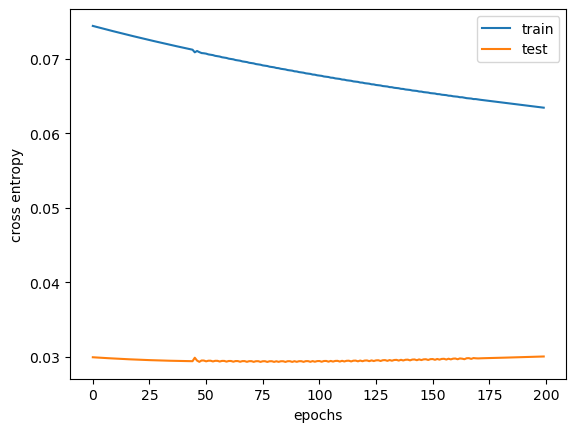

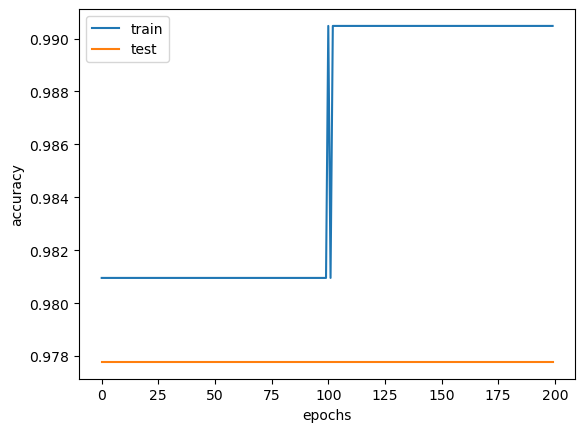

In [11]:
import matplotlib.pyplot as plt
 
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()
 
plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

You can see form the graph that at the beginning, both training and test accuracy are very low. 
This is when your model is underfitting and it is performing horribly. 
As you keep training the model, the accuracy increases and the cross entropy loss decreases. 
But at certain point, the training accuracy is higher than the test accuracy and in fact, even when the training accuracy improves, the test accuracy flattened or even lowered. 
This is when the model overfitted and you would not like to use such a model. 
That's why you want to keep track on the test accuracy and restore the model weight to the best result based on the test set.

## Complete Example

Putting everything together, the following is the complete code:

Epoch 0: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 267.42batch/s, acc=0.4, loss=1.06]


Epoch 0 validation: Cross-entropy=1.10, Accuracy=20.0%


Epoch 1: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 258.22batch/s, acc=0.2, loss=1.04]


Epoch 1 validation: Cross-entropy=1.06, Accuracy=20.0%


Epoch 2: 100%|████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 320.14batch/s, acc=0, loss=1.02]


Epoch 2 validation: Cross-entropy=1.04, Accuracy=20.0%


Epoch 3: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 249.02batch/s, acc=0.4, loss=0.989]


Epoch 3 validation: Cross-entropy=1.02, Accuracy=22.2%


Epoch 4: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 234.11batch/s, acc=0.4, loss=0.962]


Epoch 4 validation: Cross-entropy=1.00, Accuracy=55.6%


Epoch 5: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 311.86batch/s, acc=0.6, loss=0.934]


Epoch 5 validation: Cross-entropy=0.97, Accuracy=55.6%


Epoch 6: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 246.73batch/s, acc=0.6, loss=0.905]


Epoch 6 validation: Cross-entropy=0.95, Accuracy=55.6%


Epoch 7: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 309.83batch/s, acc=0.6, loss=0.874]


Epoch 7 validation: Cross-entropy=0.92, Accuracy=55.6%


Epoch 8: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 299.66batch/s, acc=0.6, loss=0.842]


Epoch 8 validation: Cross-entropy=0.89, Accuracy=55.6%


Epoch 9: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 242.49batch/s, acc=0.6, loss=0.81]


Epoch 9 validation: Cross-entropy=0.86, Accuracy=55.6%


Epoch 10: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.30batch/s, acc=0.6, loss=0.779]


Epoch 10 validation: Cross-entropy=0.83, Accuracy=57.8%


Epoch 11: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 210.93batch/s, acc=0.6, loss=0.747]


Epoch 11 validation: Cross-entropy=0.81, Accuracy=62.2%


Epoch 12: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.25batch/s, acc=0.6, loss=0.717]


Epoch 12 validation: Cross-entropy=0.78, Accuracy=62.2%


Epoch 13: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 250.78batch/s, acc=0.8, loss=0.687]


Epoch 13 validation: Cross-entropy=0.75, Accuracy=62.2%


Epoch 14: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 255.56batch/s, acc=0.8, loss=0.661]


Epoch 14 validation: Cross-entropy=0.72, Accuracy=66.7%


Epoch 15: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 322.95batch/s, acc=0.8, loss=0.635]


Epoch 15 validation: Cross-entropy=0.70, Accuracy=68.9%


Epoch 16: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 241.10batch/s, acc=0.8, loss=0.611]


Epoch 16 validation: Cross-entropy=0.68, Accuracy=71.1%


Epoch 17: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 278.96batch/s, acc=0.8, loss=0.589]


Epoch 17 validation: Cross-entropy=0.65, Accuracy=71.1%


Epoch 18: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 292.37batch/s, acc=0.8, loss=0.569]


Epoch 18 validation: Cross-entropy=0.63, Accuracy=71.1%


Epoch 19: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 284.33batch/s, acc=0.8, loss=0.55]


Epoch 19 validation: Cross-entropy=0.61, Accuracy=73.3%


Epoch 20: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 301.75batch/s, acc=0.8, loss=0.532]


Epoch 20 validation: Cross-entropy=0.59, Accuracy=77.8%


Epoch 21: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 293.53batch/s, acc=0.8, loss=0.517]


Epoch 21 validation: Cross-entropy=0.58, Accuracy=77.8%


Epoch 22: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 267.36batch/s, acc=0.8, loss=0.503]


Epoch 22 validation: Cross-entropy=0.56, Accuracy=84.4%


Epoch 23: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 255.71batch/s, acc=0.8, loss=0.489]


Epoch 23 validation: Cross-entropy=0.55, Accuracy=82.2%


Epoch 24: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 331.49batch/s, acc=0.8, loss=0.477]


Epoch 24 validation: Cross-entropy=0.53, Accuracy=84.4%


Epoch 25: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 278.76batch/s, acc=0.8, loss=0.467]


Epoch 25 validation: Cross-entropy=0.52, Accuracy=84.4%


Epoch 26: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 310.27batch/s, acc=0.8, loss=0.457]


Epoch 26 validation: Cross-entropy=0.51, Accuracy=84.4%


Epoch 27: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 253.65batch/s, acc=0.8, loss=0.448]


Epoch 27 validation: Cross-entropy=0.49, Accuracy=84.4%


Epoch 28: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 254.90batch/s, acc=0.8, loss=0.438]


Epoch 28 validation: Cross-entropy=0.48, Accuracy=84.4%


Epoch 29: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.00batch/s, acc=0.8, loss=0.431]


Epoch 29 validation: Cross-entropy=0.47, Accuracy=84.4%


Epoch 30: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 216.03batch/s, acc=0.8, loss=0.424]


Epoch 30 validation: Cross-entropy=0.46, Accuracy=86.7%


Epoch 31: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 245.89batch/s, acc=0.8, loss=0.417]


Epoch 31 validation: Cross-entropy=0.46, Accuracy=88.9%


Epoch 32: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 255.46batch/s, acc=0.8, loss=0.411]


Epoch 32 validation: Cross-entropy=0.45, Accuracy=88.9%


Epoch 33: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.77batch/s, acc=0.8, loss=0.405]


Epoch 33 validation: Cross-entropy=0.44, Accuracy=88.9%


Epoch 34: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 248.59batch/s, acc=0.8, loss=0.399]


Epoch 34 validation: Cross-entropy=0.43, Accuracy=88.9%


Epoch 35: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 272.59batch/s, acc=0.8, loss=0.394]


Epoch 35 validation: Cross-entropy=0.42, Accuracy=91.1%


Epoch 36: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 203.53batch/s, acc=0.8, loss=0.389]


Epoch 36 validation: Cross-entropy=0.42, Accuracy=93.3%


Epoch 37: 100%|████████████████████████████████████████████████████| 21/21 [00:00<00:00, 205.39batch/s, acc=0.8, loss=0.385]


Epoch 37 validation: Cross-entropy=0.41, Accuracy=93.3%


Epoch 38: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 262.33batch/s, acc=1, loss=0.381]


Epoch 38 validation: Cross-entropy=0.40, Accuracy=93.3%


Epoch 39: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 256.28batch/s, acc=1, loss=0.377]


Epoch 39 validation: Cross-entropy=0.39, Accuracy=95.6%


Epoch 40: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 261.23batch/s, acc=1, loss=0.373]


Epoch 40 validation: Cross-entropy=0.39, Accuracy=97.8%


Epoch 41: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 261.65batch/s, acc=1, loss=0.369]


Epoch 41 validation: Cross-entropy=0.38, Accuracy=97.8%


Epoch 42: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 245.17batch/s, acc=1, loss=0.366]


Epoch 42 validation: Cross-entropy=0.37, Accuracy=97.8%


Epoch 43: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 245.51batch/s, acc=1, loss=0.362]


Epoch 43 validation: Cross-entropy=0.37, Accuracy=97.8%


Epoch 44: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 213.82batch/s, acc=1, loss=0.358]


Epoch 44 validation: Cross-entropy=0.36, Accuracy=97.8%


Epoch 45: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 228.15batch/s, acc=1, loss=0.355]


Epoch 45 validation: Cross-entropy=0.36, Accuracy=97.8%


Epoch 46: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 326.90batch/s, acc=1, loss=0.352]


Epoch 46 validation: Cross-entropy=0.35, Accuracy=97.8%


Epoch 47: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 291.35batch/s, acc=1, loss=0.348]


Epoch 47 validation: Cross-entropy=0.35, Accuracy=97.8%


Epoch 48: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 320.89batch/s, acc=1, loss=0.345]


Epoch 48 validation: Cross-entropy=0.34, Accuracy=97.8%


Epoch 49: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 309.54batch/s, acc=1, loss=0.342]


Epoch 49 validation: Cross-entropy=0.34, Accuracy=97.8%


Epoch 50: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 263.25batch/s, acc=1, loss=0.339]


Epoch 50 validation: Cross-entropy=0.33, Accuracy=97.8%


Epoch 51: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 304.38batch/s, acc=1, loss=0.336]


Epoch 51 validation: Cross-entropy=0.33, Accuracy=97.8%


Epoch 52: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 298.81batch/s, acc=1, loss=0.333]


Epoch 52 validation: Cross-entropy=0.32, Accuracy=97.8%


Epoch 53: 100%|███████████████████████████████████████████████████████| 21/21 [00:00<00:00, 217.37batch/s, acc=1, loss=0.33]


Epoch 53 validation: Cross-entropy=0.32, Accuracy=97.8%


Epoch 54: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 183.97batch/s, acc=1, loss=0.328]


Epoch 54 validation: Cross-entropy=0.31, Accuracy=97.8%


Epoch 55: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 212.11batch/s, acc=1, loss=0.325]


Epoch 55 validation: Cross-entropy=0.31, Accuracy=97.8%


Epoch 56: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 202.71batch/s, acc=1, loss=0.322]


Epoch 56 validation: Cross-entropy=0.30, Accuracy=97.8%


Epoch 57: 100%|███████████████████████████████████████████████████████| 21/21 [00:00<00:00, 182.36batch/s, acc=1, loss=0.32]


Epoch 57 validation: Cross-entropy=0.30, Accuracy=97.8%


Epoch 58: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 205.70batch/s, acc=1, loss=0.317]


Epoch 58 validation: Cross-entropy=0.29, Accuracy=97.8%


Epoch 59: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 246.78batch/s, acc=1, loss=0.314]


Epoch 59 validation: Cross-entropy=0.29, Accuracy=97.8%


Epoch 60: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 183.17batch/s, acc=1, loss=0.312]


Epoch 60 validation: Cross-entropy=0.29, Accuracy=97.8%


Epoch 61: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 222.58batch/s, acc=1, loss=0.309]


Epoch 61 validation: Cross-entropy=0.28, Accuracy=97.8%


Epoch 62: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 210.24batch/s, acc=1, loss=0.307]


Epoch 62 validation: Cross-entropy=0.28, Accuracy=97.8%


Epoch 63: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 185.18batch/s, acc=1, loss=0.305]


Epoch 63 validation: Cross-entropy=0.27, Accuracy=97.8%


Epoch 64: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 174.78batch/s, acc=1, loss=0.302]


Epoch 64 validation: Cross-entropy=0.27, Accuracy=97.8%


Epoch 65: 100%|████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 190.39batch/s, acc=1, loss=0.3]


Epoch 65 validation: Cross-entropy=0.27, Accuracy=97.8%


Epoch 66: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 223.75batch/s, acc=1, loss=0.297]


Epoch 66 validation: Cross-entropy=0.26, Accuracy=97.8%


Epoch 67: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 245.83batch/s, acc=1, loss=0.295]


Epoch 67 validation: Cross-entropy=0.26, Accuracy=97.8%


Epoch 68: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 264.25batch/s, acc=1, loss=0.292]


Epoch 68 validation: Cross-entropy=0.25, Accuracy=97.8%


Epoch 69: 100%|███████████████████████████████████████████████████████| 21/21 [00:00<00:00, 245.50batch/s, acc=1, loss=0.29]


Epoch 69 validation: Cross-entropy=0.25, Accuracy=97.8%


Epoch 70: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 306.02batch/s, acc=1, loss=0.288]


Epoch 70 validation: Cross-entropy=0.25, Accuracy=97.8%


Epoch 71: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 248.41batch/s, acc=1, loss=0.285]


Epoch 71 validation: Cross-entropy=0.24, Accuracy=97.8%


Epoch 72: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 254.67batch/s, acc=1, loss=0.283]


Epoch 72 validation: Cross-entropy=0.24, Accuracy=97.8%


Epoch 73: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 199.72batch/s, acc=1, loss=0.281]


Epoch 73 validation: Cross-entropy=0.24, Accuracy=97.8%


Epoch 74: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 256.72batch/s, acc=1, loss=0.278]


Epoch 74 validation: Cross-entropy=0.23, Accuracy=97.8%


Epoch 75: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 270.86batch/s, acc=1, loss=0.276]


Epoch 75 validation: Cross-entropy=0.23, Accuracy=97.8%


Epoch 76: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 260.86batch/s, acc=1, loss=0.274]


Epoch 76 validation: Cross-entropy=0.23, Accuracy=97.8%


Epoch 77: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 248.69batch/s, acc=1, loss=0.272]


Epoch 77 validation: Cross-entropy=0.22, Accuracy=97.8%


Epoch 78: 100%|███████████████████████████████████████████████████████| 21/21 [00:00<00:00, 301.19batch/s, acc=1, loss=0.27]


Epoch 78 validation: Cross-entropy=0.22, Accuracy=97.8%


Epoch 79: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 328.72batch/s, acc=1, loss=0.267]


Epoch 79 validation: Cross-entropy=0.22, Accuracy=97.8%


Epoch 80: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.75batch/s, acc=1, loss=0.265]


Epoch 80 validation: Cross-entropy=0.22, Accuracy=97.8%


Epoch 81: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 243.41batch/s, acc=1, loss=0.263]


Epoch 81 validation: Cross-entropy=0.21, Accuracy=97.8%


Epoch 82: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 329.96batch/s, acc=1, loss=0.261]


Epoch 82 validation: Cross-entropy=0.21, Accuracy=97.8%


Epoch 83: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 304.35batch/s, acc=1, loss=0.259]


Epoch 83 validation: Cross-entropy=0.21, Accuracy=97.8%


Epoch 84: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 241.81batch/s, acc=1, loss=0.257]


Epoch 84 validation: Cross-entropy=0.20, Accuracy=97.8%


Epoch 85: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 272.12batch/s, acc=1, loss=0.255]


Epoch 85 validation: Cross-entropy=0.20, Accuracy=97.8%


Epoch 86: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 321.11batch/s, acc=1, loss=0.253]


Epoch 86 validation: Cross-entropy=0.20, Accuracy=97.8%


Epoch 87: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 260.51batch/s, acc=1, loss=0.251]


Epoch 87 validation: Cross-entropy=0.20, Accuracy=97.8%


Epoch 88: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 301.29batch/s, acc=1, loss=0.249]


Epoch 88 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 89: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 256.56batch/s, acc=1, loss=0.247]


Epoch 89 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 90: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.06batch/s, acc=1, loss=0.245]


Epoch 90 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 91: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.93batch/s, acc=1, loss=0.243]


Epoch 91 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 92: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 257.01batch/s, acc=1, loss=0.241]


Epoch 92 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 93: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 252.34batch/s, acc=1, loss=0.239]


Epoch 93 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 94: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 273.24batch/s, acc=1, loss=0.237]


Epoch 94 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 95: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.02batch/s, acc=1, loss=0.235]


Epoch 95 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 96: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 322.20batch/s, acc=1, loss=0.233]


Epoch 96 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 97: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 310.82batch/s, acc=1, loss=0.231]


Epoch 97 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 98: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 317.49batch/s, acc=1, loss=0.229]


Epoch 98 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 99: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 302.76batch/s, acc=1, loss=0.228]


Epoch 99 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 100: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 311.75batch/s, acc=1, loss=0.226]


Epoch 100 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 101: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.04batch/s, acc=1, loss=0.224]


Epoch 101 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 102: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 254.13batch/s, acc=1, loss=0.222]


Epoch 102 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 103: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 310.11batch/s, acc=1, loss=0.22]


Epoch 103 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 104: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 316.95batch/s, acc=1, loss=0.219]


Epoch 104 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 105: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 251.60batch/s, acc=1, loss=0.217]


Epoch 105 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 106: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 321.56batch/s, acc=1, loss=0.215]


Epoch 106 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 107: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 257.33batch/s, acc=1, loss=0.214]


Epoch 107 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 108: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 277.67batch/s, acc=1, loss=0.212]


Epoch 108 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 109: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.93batch/s, acc=1, loss=0.21]


Epoch 109 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 110: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 274.90batch/s, acc=1, loss=0.209]


Epoch 110 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 111: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 280.52batch/s, acc=1, loss=0.207]


Epoch 111 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 112: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 265.93batch/s, acc=1, loss=0.205]


Epoch 112 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 113: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.49batch/s, acc=1, loss=0.204]


Epoch 113 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 114: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 296.60batch/s, acc=1, loss=0.202]


Epoch 114 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 115: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 263.26batch/s, acc=1, loss=0.201]


Epoch 115 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 116: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 280.01batch/s, acc=1, loss=0.199]


Epoch 116 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 117: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 308.32batch/s, acc=1, loss=0.197]


Epoch 117 validation: Cross-entropy=0.13, Accuracy=97.8%


Epoch 118: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 260.00batch/s, acc=1, loss=0.196]


Epoch 118 validation: Cross-entropy=0.13, Accuracy=97.8%


Epoch 119: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 324.74batch/s, acc=1, loss=0.194]


Epoch 119 validation: Cross-entropy=0.13, Accuracy=97.8%


Epoch 120: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 317.26batch/s, acc=1, loss=0.193]


Epoch 120 validation: Cross-entropy=0.13, Accuracy=97.8%


Epoch 121: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 303.94batch/s, acc=1, loss=0.191]


Epoch 121 validation: Cross-entropy=0.13, Accuracy=97.8%


Epoch 122: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.97batch/s, acc=1, loss=0.19]


Epoch 122 validation: Cross-entropy=0.13, Accuracy=97.8%


Epoch 123: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 311.93batch/s, acc=1, loss=0.188]


Epoch 123 validation: Cross-entropy=0.13, Accuracy=97.8%


Epoch 124: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 256.20batch/s, acc=1, loss=0.187]


Epoch 124 validation: Cross-entropy=0.12, Accuracy=97.8%


Epoch 125: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 306.65batch/s, acc=1, loss=0.186]


Epoch 125 validation: Cross-entropy=0.12, Accuracy=97.8%


Epoch 126: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 317.68batch/s, acc=1, loss=0.184]


Epoch 126 validation: Cross-entropy=0.12, Accuracy=97.8%


Epoch 127: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 332.43batch/s, acc=1, loss=0.183]


Epoch 127 validation: Cross-entropy=0.12, Accuracy=97.8%


Epoch 128: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 250.83batch/s, acc=1, loss=0.181]


Epoch 128 validation: Cross-entropy=0.12, Accuracy=97.8%


Epoch 129: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 206.46batch/s, acc=1, loss=0.18]


Epoch 129 validation: Cross-entropy=0.12, Accuracy=97.8%


Epoch 130: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 263.74batch/s, acc=1, loss=0.179]


Epoch 130 validation: Cross-entropy=0.12, Accuracy=97.8%


Epoch 131: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 260.87batch/s, acc=1, loss=0.177]


Epoch 131 validation: Cross-entropy=0.12, Accuracy=97.8%


Epoch 132: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.47batch/s, acc=1, loss=0.176]


Epoch 132 validation: Cross-entropy=0.11, Accuracy=97.8%


Epoch 133: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 328.91batch/s, acc=1, loss=0.175]


Epoch 133 validation: Cross-entropy=0.11, Accuracy=97.8%


Epoch 134: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 254.98batch/s, acc=1, loss=0.173]


Epoch 134 validation: Cross-entropy=0.11, Accuracy=97.8%


Epoch 135: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 310.46batch/s, acc=1, loss=0.172]


Epoch 135 validation: Cross-entropy=0.11, Accuracy=97.8%


Epoch 136: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 309.85batch/s, acc=1, loss=0.171]


Epoch 136 validation: Cross-entropy=0.11, Accuracy=97.8%


Epoch 137: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.07batch/s, acc=1, loss=0.169]


Epoch 137 validation: Cross-entropy=0.11, Accuracy=97.8%


Epoch 138: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 260.69batch/s, acc=1, loss=0.168]


Epoch 138 validation: Cross-entropy=0.11, Accuracy=97.8%


Epoch 139: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 242.40batch/s, acc=1, loss=0.167]


Epoch 139 validation: Cross-entropy=0.11, Accuracy=97.8%


Epoch 140: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 313.66batch/s, acc=1, loss=0.166]


Epoch 140 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 141: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 309.51batch/s, acc=1, loss=0.164]


Epoch 141 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 142: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 293.55batch/s, acc=1, loss=0.163]


Epoch 142 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 143: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 314.90batch/s, acc=1, loss=0.162]


Epoch 143 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 144: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 251.14batch/s, acc=1, loss=0.161]


Epoch 144 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 145: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 343.54batch/s, acc=1, loss=0.16]


Epoch 145 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 146: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 253.25batch/s, acc=1, loss=0.158]


Epoch 146 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 147: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 261.31batch/s, acc=1, loss=0.157]


Epoch 147 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 148: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 297.01batch/s, acc=1, loss=0.156]


Epoch 148 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 149: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 301.71batch/s, acc=1, loss=0.155]


Epoch 149 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 150: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 262.57batch/s, acc=1, loss=0.154]


Epoch 150 validation: Cross-entropy=0.10, Accuracy=97.8%


Epoch 151: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 305.55batch/s, acc=1, loss=0.153]


Epoch 151 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 152: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 256.25batch/s, acc=1, loss=0.152]


Epoch 152 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 153: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 329.14batch/s, acc=1, loss=0.151]


Epoch 153 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 154: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 307.90batch/s, acc=1, loss=0.15]


Epoch 154 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 155: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 225.00batch/s, acc=1, loss=0.148]


Epoch 155 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 156: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 309.24batch/s, acc=1, loss=0.147]


Epoch 156 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 157: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 299.57batch/s, acc=1, loss=0.146]


Epoch 157 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 158: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.57batch/s, acc=1, loss=0.145]


Epoch 158 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 159: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 208.30batch/s, acc=1, loss=0.144]


Epoch 159 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 160: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 260.33batch/s, acc=1, loss=0.143]


Epoch 160 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 161: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 333.89batch/s, acc=1, loss=0.142]


Epoch 161 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 162: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 252.66batch/s, acc=1, loss=0.141]


Epoch 162 validation: Cross-entropy=0.09, Accuracy=97.8%


Epoch 163: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 299.87batch/s, acc=1, loss=0.14]


Epoch 163 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 164: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 300.19batch/s, acc=1, loss=0.139]


Epoch 164 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 165: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 287.10batch/s, acc=1, loss=0.138]


Epoch 165 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 166: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 262.42batch/s, acc=1, loss=0.137]


Epoch 166 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 167: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 332.57batch/s, acc=1, loss=0.136]


Epoch 167 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 168: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 244.20batch/s, acc=1, loss=0.135]


Epoch 168 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 169: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 312.18batch/s, acc=1, loss=0.134]


Epoch 169 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 170: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 293.39batch/s, acc=1, loss=0.133]


Epoch 170 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 171: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 321.56batch/s, acc=1, loss=0.133]


Epoch 171 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 172: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 311.80batch/s, acc=1, loss=0.132]


Epoch 172 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 173: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 303.13batch/s, acc=1, loss=0.131]


Epoch 173 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 174: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 291.31batch/s, acc=1, loss=0.13]


Epoch 174 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 175: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 285.83batch/s, acc=1, loss=0.129]


Epoch 175 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 176: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 319.87batch/s, acc=1, loss=0.128]


Epoch 176 validation: Cross-entropy=0.08, Accuracy=97.8%


Epoch 177: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 366.51batch/s, acc=1, loss=0.127]


Epoch 177 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 178: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 403.36batch/s, acc=1, loss=0.126]


Epoch 178 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 179: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 312.25batch/s, acc=1, loss=0.125]


Epoch 179 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 180: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.08batch/s, acc=1, loss=0.125]


Epoch 180 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 181: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 315.52batch/s, acc=1, loss=0.124]


Epoch 181 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 182: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 246.45batch/s, acc=1, loss=0.123]


Epoch 182 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 183: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 291.15batch/s, acc=1, loss=0.122]


Epoch 183 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 184: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 305.39batch/s, acc=1, loss=0.121]


Epoch 184 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 185: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 261.27batch/s, acc=1, loss=0.12]


Epoch 185 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 186: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 311.12batch/s, acc=1, loss=0.12]


Epoch 186 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 187: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 304.79batch/s, acc=1, loss=0.119]


Epoch 187 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 188: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 259.76batch/s, acc=1, loss=0.118]


Epoch 188 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 189: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 320.12batch/s, acc=1, loss=0.117]


Epoch 189 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 190: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 256.95batch/s, acc=1, loss=0.117]


Epoch 190 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 191: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 304.84batch/s, acc=1, loss=0.116]


Epoch 191 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 192: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.58batch/s, acc=1, loss=0.115]


Epoch 192 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 193: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 318.59batch/s, acc=1, loss=0.114]


Epoch 193 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 194: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 304.57batch/s, acc=1, loss=0.114]


Epoch 194 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 195: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 336.55batch/s, acc=1, loss=0.113]


Epoch 195 validation: Cross-entropy=0.07, Accuracy=97.8%


Epoch 196: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 252.77batch/s, acc=1, loss=0.112]


Epoch 196 validation: Cross-entropy=0.06, Accuracy=97.8%


Epoch 197: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 272.63batch/s, acc=1, loss=0.111]


Epoch 197 validation: Cross-entropy=0.06, Accuracy=97.8%


Epoch 198: 100%|█████████████████████████████████████████████████████| 21/21 [00:00<00:00, 307.73batch/s, acc=1, loss=0.111]


Epoch 198 validation: Cross-entropy=0.06, Accuracy=97.8%


Epoch 199: 100%|██████████████████████████████████████████████████████| 21/21 [00:00<00:00, 255.30batch/s, acc=1, loss=0.11]


Epoch 199 validation: Cross-entropy=0.06, Accuracy=97.8%


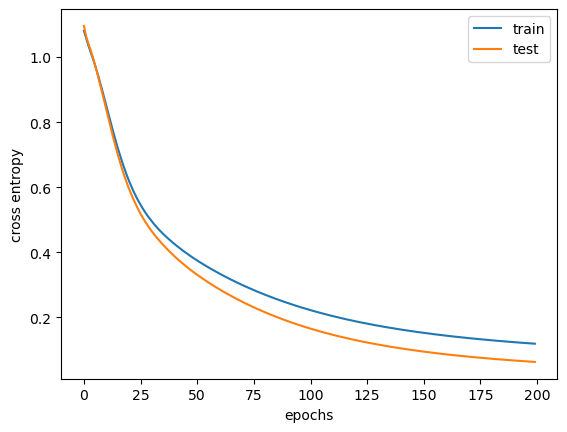

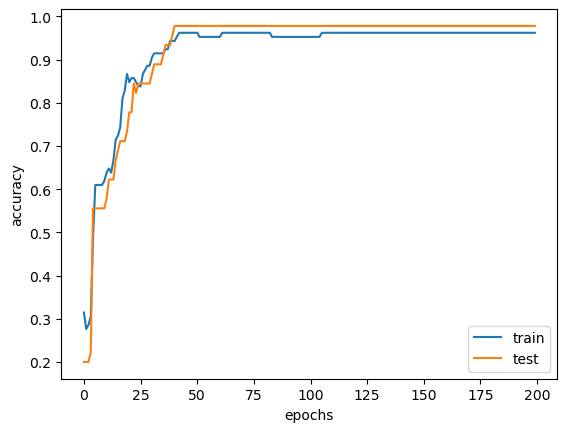

In [12]:
import copy
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
 
# read data and apply one-hot encoding
data = pd.read_csv("iris.csv", header=None)
X = data.iloc[:, 0:4]
y = data.iloc[:, 4:]
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y)
y = ohe.transform(y)
 
# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
 
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(4, 8)
        self.act = nn.ReLU()
        self.output = nn.Linear(8, 3)
 
    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x

# loss metric and optimizer
model = Multiclass()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
# prepare model and training parameters
n_epochs = 200
batch_size = 5
batches_per_epoch = len(X_train) // batch_size
 
best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []
 
# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)
 
# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()
 
plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## Summary

In this tutorial, you discovered how to develop and evaluate a neural network for multiclass classification using PyTorch.
By completing this tutorial, you learned:

- How to load data and convert them to PyTorch tensors
- How to prepare multi-class classification data for modeling using one-hot encoding
- How to define a deep learning model with PyTorch for multi-class classification
- How to measure the the likeness of model output to the expected result of a multi-class classification
- How to run a training loop on a PyTorch model, and collect evaluation metrics